# < 백화점 데이터로 고객 성별 예측하기 >
ML assignment 2 20172814 구아영

### Summary
* 목차

**Part0. Data Reading & Make Features**

    * Data Reading & Make Features
    X_train, X_test, y_train 데이터를 불러오고 확인한다.
    
    * Outlier
    그 후, 이상치를 제거한다. 데이터의 행이 많지 않기 때문에, 사분위수 범위를 이용하는 방법과 상한선과 하한선을 이용하는 방법 중, 이상치로 지정되는 행이 더 적은 상한선/하한선 방법을 사용한다.
    
    * Make Features
    지난번 과제 1에서 생성했던 피쳐들을 X_train 데이터와 X_test 데이터에 동일하게 만든다.

**part1. EDA & Feature Relationship**

      * EDA
      X_train 데이터를 통해 지난 과제 1에서 생성한 피쳐들의 분포와 성별에 따라 유의미한 차이가 있는지 간략하게 확인하다.
      
      * FEature Relationship
       피쳐와 종속변수와의 상관계수를 봄으로써 유의미한 피쳐를 파악하고, 피쳐간의 상관계수를 봄으로써 독립변수의 다중공선성을 확인한다.

**part2. Feature engineering**

       * Feature construction
       1. 피쳐들 중 극단적인 값이 있는 피쳐들은 왼쪽으로 치우쳐지고 오른쪽으로 긴 꼬리를 갖는 분포를 가지게 된다. 이를 정규분포를 만들어주기 위해 로그 변환을 수행한 새로운 피쳐를 만든다.
       2. 성별에 따라 뚜렷한 차이가 나타나지 않는 분포들은 구간에 따라 그룹화하여 범주형 변수인 새로운 피쳐를 만들고 그 후 새로운 피쳐가 성별에 따른 차이가 발생하는지 확인한다.
       3. 피쳐들간의 상호작용에 따른 성별에 차이가 발생하는지 확인하고 두 개의 범주형 변수들을 조합하여 남성을 구분할 수 있는 새로운 피쳐를 생성한다.
       
       * One-hot Encoding & PCA
       범주형 변수들에 원-핫 인코딩을 수행하여 모든 범주형 변수를 더미변수로 바꿔준다.
       더미변수로 변환하는 과정을 거치면 데이터가 sparse 해지기 때문에 PCA를 통해 데이터를 dense하게 바꿔준다.
       
       *Feature Selection
       모델링에 사용될 피쳐들을 선택한다. 이 때, SelectKBest방법과 RandomForest방법을 모두 수행한 후 성능이 더 좋은 RF 모델을 이용하는 방식으로 최종 피쳐들을 선택하였다.
       
       *Normalisation
       선택된 피쳐들은 모든 변수들이 0에서 1사이의 값을 가질 수 있도록 Min-Max Scale을 진행한다.

**part3. Modeling**

    *개별 모델 성능 확인
    먼저 사용할 수 있는 9개의 개별 모델 성능을 확인한다.
    [SVC, DecisionTreeClassifier, AdaBoostCalssifier, RandomForestClassifier, GradientBoostingClassifier, MLPClassifier, KNeighborsClassifier ,LogisticRegression, LinearDiscriminantAnalysis]
    개별 모델의 CV 결과 평균 roc-auc와 Error를 본 후 모델 6개를 선정한다. [Logistic, SVC, MLP, GDB, RF, KNN]
    
    *Hyperparameter Tuning
    선정된 모델을 Grid Search 방법으로 하이퍼파라미터를 튜닝한 후 roc-auc가 가장 높은 모델 3개를 선정한다 [MLP,Logistic,SVC]
    
    *Model Ansemble
    모든 모델을 soft voting한 경우가 top 3 모델만 soft voting한 경우보다 roc-auc가 더 높다 (0.7336 vs. 0.7330)
    
    staking은 성능이 가장 좋은 top 3모델을 이용한 경우와 MLP와의 상관관계가 낮은 모델을 이용한 경우 중 상관관계가 낮은 모델을 이용한 경우 roc-auc가 더 높다. (0.69 vs. 0.70)
  
 **part4. prediction**
  
      모든 모델을 앙상블 했을 때보다 top3 모델을 앙상블 했을 때 roc-auc가 조금 더 낮았지만 너무 많은 모델을 사용하면 과적합의 우려가 있기 때문에 최종적으로 top3모델을 soft voting 앙상블 한 모형을 선택한다.


## Part 0. Data Reading & Make Feautres

### 환경 설정

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
os.getcwd()

'C:\\Users\\82105\\Documents\\머신 러닝'

In [5]:
#os.chdir('/content/drive/My Drive/Colab Notebooks/머신러닝')

### Data Reading

X_train data

In [6]:
X_train = pd.read_csv('X_train.csv',encoding='cp949')
X_train.head(n=3)

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000


y_train data

In [7]:
y_train = pd.read_csv('y_train.csv',encoding='cp949')
y_train.head(n=3)

,cust_id,gender
0,0,0
1,1,0
2,2,1


X_test data

In [8]:
X_test = pd.read_csv('X_test.csv',encoding='cp949')
X_test.head(n=3)

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,3500,2007-01-16 00:00:00,부산본점,735126,기초A,화장품,2465000
1,3500,2007-01-20 00:00:00,부산본점,443227,비지니스군,셔츠,675000
2,3500,2007-03-02 00:00:00,부산본점,461257,트래디셔널Ⅱ,트래디셔널,1840000


X_train에서 생성한 파생변수를 X_test에서도 동일하게 생성하기 위해 X_train 데이터와 X_test 병합

In [9]:
X_data = pd.concat([X_train,X_test])
X_data # X_train data와 X_test가 합쳐진 데이터

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
163553,5981,2007-01-12 00:00:00,영등포점,50105,일반가공식품,가공식품,209000
163554,5981,2007-01-12 00:00:00,영등포점,50109,상품군미지정,기타,7150
163555,5981,2007-01-12 00:00:00,영등포점,50105,햄,축산가공,9500
163556,5981,2007-01-12 00:00:00,영등포점,50105,상품군미지정,기타,9500


### 결측치 확인

In [10]:
X_data.isnull().sum() # 결측치 없음

cust_id             0
tran_date           0
store_nm            0
goods_id            0
gds_grp_nm          0
gds_grp_mclas_nm    0
amount              0
dtype: int64

### 이상치 (Outlier) 처리

      row data의 'amount'열에 대해 이상치를 처리해준다

* 방법 1 : 사분위 범위 이용

Q3 + 1.5 * IQR 보다 크거나 Q1 - 1.5 * IQR 보다 작은 수를 이상치로 지정

In [0]:
Q1 = np.percentile(X_data['amount'],0.25)
Q3 = np.percentile(X_data['amount'],0.75)
IQR = Q3 - Q1
step = IQR *1.5
X_data[(X_data['amount'] < Q1 - step) | (X_data['amount'] > Q3 + step)]


18542개 record가 이상치로 지정되으며 너무 많은 레코드가 이상치로 지정되었다.



* 방법 2 : 상한선 이용

상위 97.5%의 값을 상한선으로 정하고, 해당 기준치보다 높은 값들을 이상치로 지정

In [0]:
np.quantile(X_data.amount,0.975,axis=0) # 상위 97.5%의 값을 상한선으로

13050000.0

In [0]:
X_data[X_data['amount'] >= np.quantile(X_data['amount'],0.975,axis=0)]

9893개의 recorde가 이상치로 지정되었다. 너무 많은 값들이 이상치로 지정되어 변환되는 것을 방지하기 위해 방법 2(상한선 이용)를 통해 이상치를 처리한다.

In [0]:
outlier_value = np.quantile(X_data['amount'],0.975,axis=0)
X_data.loc[X_data['amount']>=outlier_value,'amount'] = outlier_value
X_data

### Make Features

파생변수를 저장할 빈 리스트 생성

In [0]:
features = []

1. Numeric Features

**[파생변수 1-4]** 총구매액, 구매건수, 평균구매액, 최대구매액, 구매상품종류(goods_id, gds_grp_nm, gds_grp_mclas_nm 각각), 내점일수, 구매주기, 주말방문비율, 계절별 구매비율 (봄,여름,가을,겨울 각각)

In [0]:
f= X_data.groupby('cust_id').agg({
    'amount' : [('총구매액', lambda x: np.sum(x)),
                ('구매건수', lambda x: np.size(x)),
                ('평균구매액', lambda x: np.round(np.mean(x))),
                ('최대구매액', lambda x: np.max(x))],
    'goods_id': [('구매상품종류1', lambda x: x.nunique())],
    'gds_grp_nm': [('구매상품종류2', lambda x: x.nunique())],
    'gds_grp_mclas_nm': [('구매상품종류3', lambda x: x.nunique())],
    'tran_date' : [
    ('내점일수',lambda x: x.str[:10].nunique()),
    ('구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique())),
    ('주말방문비율', lambda x: np.mean(pd.to_datetime(x).dt.dayofweek>4)),
    ('봄-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( pd.to_datetime(x).dt.month.isin([1,2,12])))
    ]
})
f.columns = f.columns.droplevel()
f = f.reset_index()
features.append(f); display(f)

**[파생변수 15-16]** 환불금액, 환불건수

In [0]:
f = X_data[X_data.amount < 0].groupby('cust_id')['amount'].agg([
    ('환불금액', lambda x: x.sum() * -1),
    ('환불건수', np.size)
]).reset_index()
features.append(f); f
# 금액이 음수면 환불

**[파생변수 17-18]** 내점 당 구매액, 구매건수

In [0]:
# 내점 당 구매액 = 총구매액 / 내점일수
visits = X_data.groupby('cust_id')['tran_date'].agg(lambda x: x.nunique())
f = (X_data.groupby('cust_id')['amount'].sum() / visits).reset_index().rename(columns={0 : "내점당구매액"})
features.append(f); display(f)
f = (X_data.groupby('cust_id')['amount'].size() / visits).reset_index().rename(columns={0 : "내점당구매건수"})
features.append(f); f

**[파생변수 19-24]** 최근 3개월, 6개월, 12개월 구매금액 및 구매건수

In [0]:
# pd.to_datetime(), pd.offsets.MonthBegin(3)
for m in [3,6,12]:
    start = str(pd.to_datetime(X_data.tran_date.max()) - pd.offsets.MonthBegin(m))
    f = X_data.query('tran_date >= @start').groupby('cust_id')['amount'].agg([
        (f'최근{m}개월_구매금액', np.sum), 
        (f'최근{m}개월_구매건수', np.size)
    ]).reset_index()
    display(f)
    features.append(f)

**[파생변수 25]** 구매추세 패턴

    구매추세 패턴 변수 설명 :
        시간이 흐름에 따라 고객의 구매금액이 어떻게 변화했는지를 알아보기 위해,
        마지막 구매 전 한달 동안의 구매금액에서 최초 구매 후 한달 동안의 구매금액을 뺀 값
        (한달은 30일로 함.)


In [0]:
from datetime import timedelta

In [0]:
dat = X_train.groupby('cust_id').agg({
    'tran_date' : [('최초구매일',lambda x: str(pd.to_datetime(min(x)))),
                   ('최후구매일',lambda x: str(pd.to_datetime(max(x))))]
})
dat.columns = dat.columns.droplevel()
dat = dat.reset_index()

dat['최초구매일후한달'] = pd.to_datetime(dat.최초구매일) + timedelta(days=30)
dat['최후구매일전한달'] = pd.to_datetime(dat.최후구매일) - timedelta(days=30)
dat['최초구매일후한달'] =dat.최초구매일후한달.apply(lambda x: str(x))
dat['최후구매일전한달'] =dat.최후구매일전한달.apply(lambda x: str(x))

f = pd.merge(X_data,dat,how='inner')

# 최초 구매일 후 한달 동안의 구매 금액
a = f.query('tran_date >= 최초구매일 and tran_date <= 최초구매일후한달').groupby('cust_id')['amount'].sum()
a = a.reset_index().rename(columns={'amount':'startamount'})

# 마지막 구매일 전 한달 동안의 구매 금액
b = f.query('tran_date <= 최후구매일 and tran_date >= 최후구매일전한달').groupby('cust_id')['amount'].sum()
b = b.reset_index().rename(columns={'amount':'endamount'})

# 구매 금액의 차이를 계산
f = pd.merge(a,b)
f['구매추세패턴'] = f.endamount - f.startamount
f = f[['cust_id','구매추세패턴']]
features.append(f); f

**[파생변수 26]** 가격 선호도

    가격 선호도 변수 설명 :
        고객이 가장 많이 구매하는 가격대
        (단위는 만원으로 함)

In [0]:
f = X_train.groupby('cust_id')['amount'].agg([
    ('주구매금액대', lambda x: (x // 10000).value_counts().index[0])
]).reset_index()

features.append(f); f

**[파생변수 27]** 시즌 선호도

    시즌 선호도 변수 설명 :
        해당 변수는 범주형 변수가 아닌 수치형 변수
        시즌 별 구매 건수를 계산 후 가장 선호하는 계절과 가장 비선호하는 계절의 구매 건수의 차이를 구한다.

가장 많이 산 계절의 구매 건수와 가장 적게 산 계절의 구매 건수의 차이

In [0]:
season = []
for i in X_data.tran_date :
    a = int(i[5:7])
    if a in [3,4,5] :
        season.append('봄')
    if a in [6,7,8] :
        season.append('여름')
    if a in [9,10,11] :
        season.append('가을')
    if a in [12,1,2] :
        season.append('겨울')
f = X_data.copy()
f['season'] = season
f

In [0]:
f = f.groupby(['cust_id','season'])['amount'].agg([
    ('amount', lambda x: np.size(x))
     ]).reset_index()
f = f.groupby(['cust_id'])['amount'].agg([
    ('시즌선호도',lambda x: x.max()-x.min())
]).reset_index()
features.append(f); f 

**[파생변수 28]** 휴면 (또는 이탈) 여부

    휴면 여부 변수 설명:
        단순히 6개월 이내 방문한 적이 없는 고객을 휴면 고객으로 분류
        (고객의 구매주기를 이용해 휴면 고객으로 분류하면 한 번만 구매한 고객이 문제가 될 수 있음
        한 번만 구매한 고객은 구매주기가 0이지만 마지막 구매가 최근에 일어났다면 이탈 고객이 아닐 여지가 존재)

In [0]:
# 가장 마지막 날로부터 6개월 이전 날짜
inactive = "2007-06-31 00:00:00"

#6개월 이내에 구매한 적이 있는 고객은 0으로
f = X_data.query('tran_date >= @inactive').groupby('cust_id').size().reset_index()
f['inactive'] = 0

# 6개월 이내에 구매한 적이 없는 고객은 1로
f = pd.merge(pd.DataFrame(range(3500)).rename(columns={0:'cust_id'}),f,how='left').fillna(1)
f= f[['cust_id','inactive']]
features.append(f); display(f)

**[파생변수 29-58]** Top-10 베스트 셀러(gds_grp_mclas_nm)에 대한 구매 금액/건수/여부

    Top-10 베스트 셀러와 관련된 변수 설명 :
        Top-10 베스트 셀러는 전체 구매 건수로 선정 (단, 기타는 제외)
        (농산물, 가공식품, 축산가공, 수산품, 화장품, 디자이너, 시티웨어, 리용잡화, 육류, 차/커피)


In [0]:
# Top-10 베스트 셀러
top10 = list(X_data.gds_grp_mclas_nm.value_counts()[1:11].index) # 기타는 제외
top10

['농산물', '가공식품', '축산가공', '수산품', '화장품', '디자이너', '시티웨어', '일용잡화', '육류', '차/커피']

In [0]:
#구매 금액/ 건수/ 여부 별로 feature의 이름을 다르게 지정
top10m = []
top10t = []
top10y = []
for t in top10 : top10m.append(t + "금액")
for t in top10 : top10t.append(t + "건수")
for t in top10 : top10y.append(t + "여부")

In [0]:
# 구매 금액
f = X_data.groupby(['cust_id','gds_grp_mclas_nm'])['amount'].sum().reset_index()
f = pd.pivot_table(f,index='cust_id',columns='gds_grp_mclas_nm',fill_value=0).reset_index()['amount'][top10]
f.columns = top10m
f['cust_id']=range(5982)
cols = f.columns.tolist()
cols = cols[-1:] + cols[:-1] 
f = f[cols]
features.append(f); display(f)

# 구매 건수
f = X_data.groupby(['cust_id','gds_grp_mclas_nm'])['amount'].size().reset_index()
f = pd.pivot_table(f,index='cust_id',columns='gds_grp_mclas_nm',fill_value=0).reset_index()['amount'][top10]
f.columns = top10t
f['cust_id']=range(5982)
cols = f.columns.tolist()
cols = cols[-1:] + cols[:-1] 
f = f[cols]
features.append(f); display(f)

# 구매 여부
# 구매 건수가 0 초과이면 1, 그렇지 않으면 0을 부여
f = X_data.groupby(['cust_id','gds_grp_mclas_nm'])['amount'].agg([
    ('amount', lambda x: 1 if np.size(x) > 0 else 0)
])
f = pd.pivot_table(f,index='cust_id',columns='gds_grp_mclas_nm',fill_value=0).reset_index()['amount'][top10]
f.columns=top10y
f['cust_id']=range(5982)
cols = f.columns.tolist()
cols = cols[-1:] + cols[:-1] 
f = f[cols]
features.append(f); display(f)

<br><font color='green'>
### Categorical Features

**[파생변수 59~60]** 주구매 상품: 가장 많이 구매한 상품(gds_grp_mclas_nm), 주구매 지점

In [0]:
f =X_data.groupby('cust_id').agg({
    'gds_grp_mclas_nm' : [('주구매상품', lambda x: x.value_counts().index[0])],
    'store_nm' : [('주구매지점', lambda x: x.value_counts().index[0])]
}).reset_index()
f.columns = f.columns.droplevel()
f.columns = ['cust_id','주구매상품','주구매지점']
features.append(f); display(f)

**[파생변수 61]** 상품별 구매순서

    상품별 구매순서 변수 설명 :
        tran_date 변수에는 time 정보가 존재하지 않음
        따라서 transactions 데이터 자체를 거래가 발생한 순서대로 정렬되어있음을 가정함
        (먼저 나타나는 행이 더 빨리 발생한 거래라고 판단)
        
        하루에 가장 먼저 구매한 횟수가 제일 많은 상품을 파생변수에 입력

In [0]:
f = X_data.groupby(['cust_id','tran_date'])['gds_grp_mclas_nm'].agg([
    ('상품구매순서',lambda x :x.unique()[0])
]).reset_index()
f = f.groupby('cust_id')['상품구매순서'].agg([
    ('상품구매순서', lambda x : x.value_counts().index[0])
]).reset_index()
features.append(f); f

<br><font color='red'>
**[파생변수 62-70]** 추가로 제안된 새로운 파생변수

### Numeric variable

**[파생변수 62]** 구매한 지점의 다양성

In [0]:
f = X_data.groupby('cust_id').agg({
    'store_nm': [('구매지점수', lambda x: x.nunique())],
})
f.columns = f.columns.droplevel() 
f=f.reset_index()
features.append(f); f

**[파생변수 63]** 환불 물품의 다양성

    환불 물품 다양성 변수 설명 :
        얼마나 다양한 물품을 환불하였는가를 나타내는 변수
        똑같이 환불 건수가 높은 상황이더라도, 여성의 경우 남성보다 더욱 다양한 물품을 환불했을 수도 있음

In [0]:
f = X_data[X_data.amount < 0].groupby('cust_id')['gds_grp_mclas_nm'].size().reset_index()
f = f.rename(columns={'gds_grp_mclas_nm' : '환불물품종류'})
features.append(f); f

**[파생변수 64]** 구매금액 표준편차

    구매금액 표준편차 변수 설명 :
        구매금액의 분산 정도를 알아보기 위한 변수

In [0]:
f = X_data.groupby('cust_id')['amount'].agg([
    ('구매액표준편차', lambda x : np.std(x))
]).reset_index().rename(columns={'amount' : '구매액표준편차'})
features.append(f); f

**[파생변수 65~68]** 연초/연말의 구매금액/건수

    연초 변수 설명 :
        1,2월에 발생한 거래의 금액과 건수
        연초에는 새해, 설날 등 명절이 많기 때문에 여성이 남성보다 구매활동이 비교적 더 활발하게 일어날 수 있음)

    연말 변수 설명 :
        11,12월에 발생한 거래의 금액과 건수
        크리스마스, 송년회 등 연말 행사로 인해 남성의 지출이 늘어날 수 있음

In [0]:
f = X_data[(pd.to_datetime(X_data.tran_date).dt.month == 1) | (pd.to_datetime(X_data.tran_date).dt.month == 2)]
f= f.groupby('cust_id')['amount'].agg([
    ('연초구매금액',lambda x: x.sum()),
    ('연초구매건수', lambda x: np.size(x))
]).reset_index()
features.append(f); display(f)

f = X_data[(pd.to_datetime(X_data.tran_date).dt.month == 11) | (pd.to_datetime(X_data.tran_date).dt.month == 12)]
f = f.groupby('cust_id')['amount'].agg([
    ('연말구매금액',lambda x: x.sum()),
    ('연말구매건수', lambda x: np.size(x))
]).reset_index()
features.append(f); display(f)

**[파생변수 69]** 가장 많이 구매하는 상품의 소분류 (gds_grp_nm)

In [0]:
X_data.gds_grp_nm.value_counts()[1:11] # 기타 제외
f = X_data.groupby('cust_id')['gds_grp_nm'].agg([
    ('주구매상품', lambda x: x.value_counts().index[0])
]).reset_index()
features.append(f); f

**[파생변수 70]** 가장 선호하는 계절

In [0]:
#가장 많이 구매하는 계절은?

f = X_data.groupby('cust_id')['tran_date'].agg([
    ('봄', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([1,2,12]))),
]).reset_index()
f = pd.concat([f[['cust_id']],pd.DataFrame(f[['봄','여름','가을','겨울']].idxmax(axis=1))],axis=1)
f.columns = ['cust_id','선호계절']
features.append(f); f

데이터 분할

In [0]:
X_train = pd.DataFrame({'cust_id':X_train.sort_values(by='cust_id')['cust_id'].unique()})
for f in features :
    try:
        X_train = pd.merge(X_train,f,how='left',left_on='cust_id',right_on='cust_id').fillna(0)
    except:
        pass
display(X_train)

X_test = pd.DataFrame({'cust_id':X_test.sort_values(by='cust_id')['cust_id'].unique()})
for f in features :
    try:
        X_test = pd.merge(X_test,f,how='left',left_on='cust_id',right_on='cust_id').fillna(0)
    except:
        pass
display(X_test)

생성된 Feature csv 파일로 내보내기

In [11]:
# X_train.to_csv('X_train_features.csv',index=False)
# X_test.to_csv('X_test_features.csv',index=False)

## part 1. EDA & Feature relationship

In [225]:
X_train = pd.read_csv('X_train_features.csv',encoding='utf-8')
X_test = pd.read_csv('X_test_features.csv',encoding='utf-8')

In [226]:
y_train = pd.read_csv('y_train.csv')

In [227]:
X_train['gender']=y_train['gender']

### y class 분포 확인

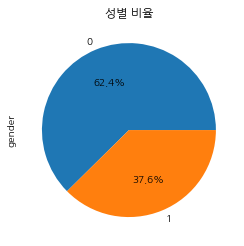

In [15]:
X_train.gender.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('성별 비율')
plt.show()

# 클래스 불균형
# 여성(0)이 남성(1)보다 약 25%정도 많음

### Numeric 변수 분포 확인

In [16]:
numeric = X_train.columns[1:59]
numeric = numeric.append(X_train.columns[62:69])

* 분포 확인

파생변수 변수 분포

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


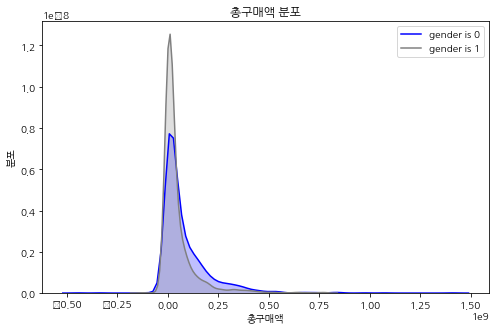

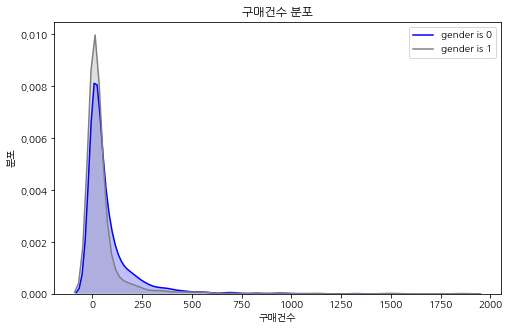

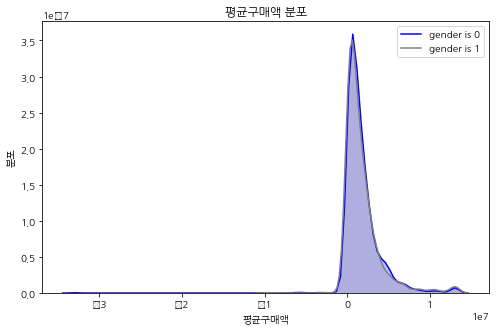

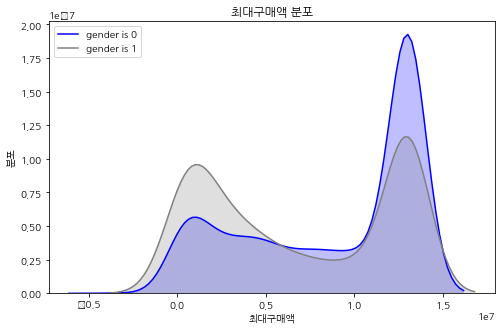

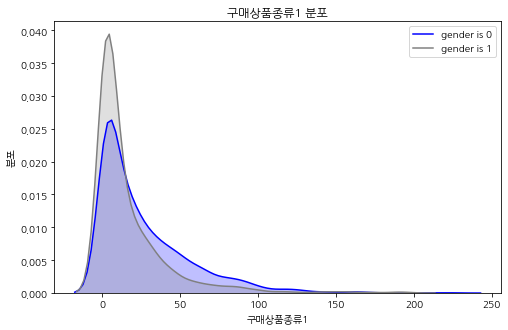

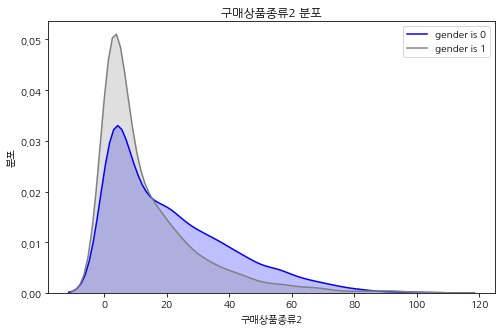

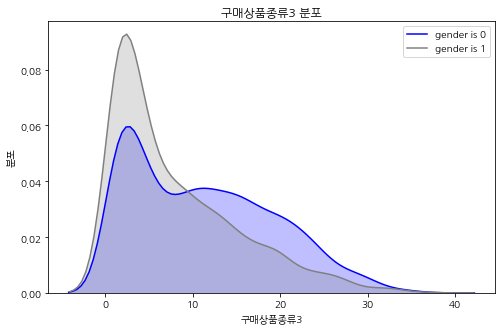

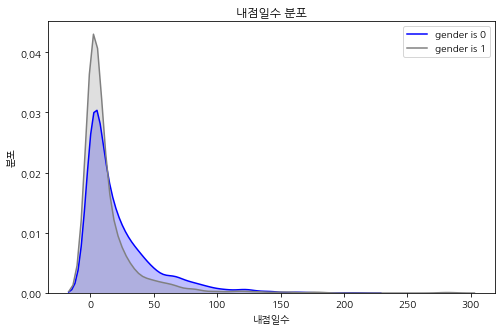

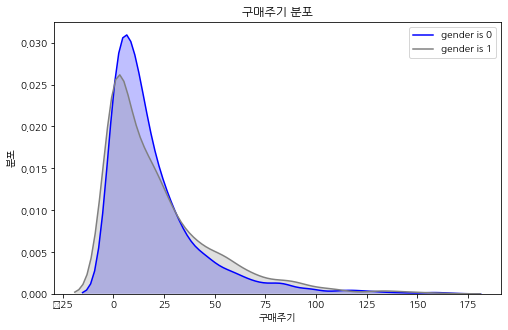

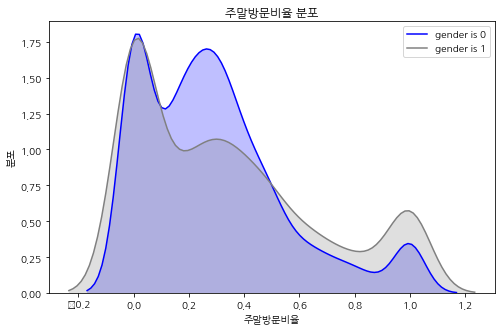

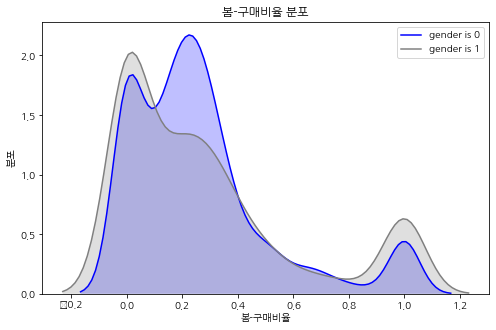

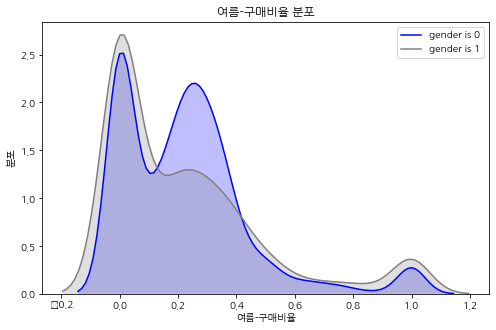

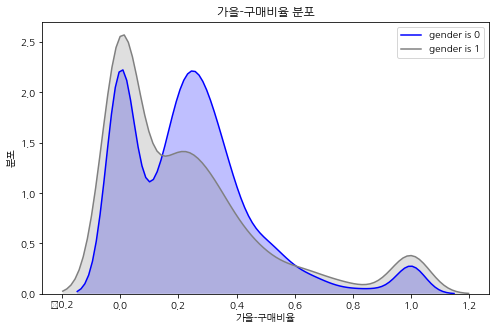

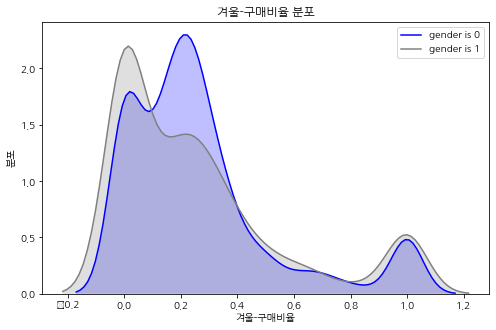

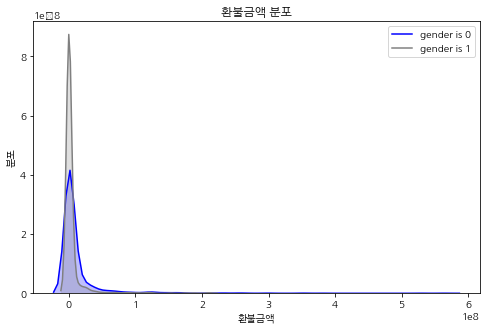

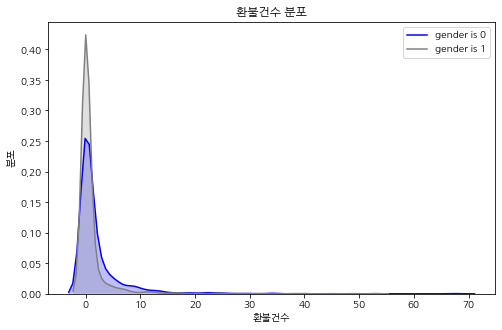

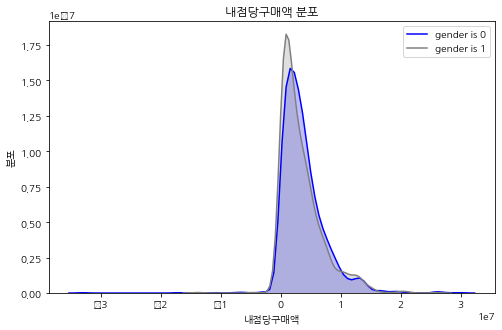

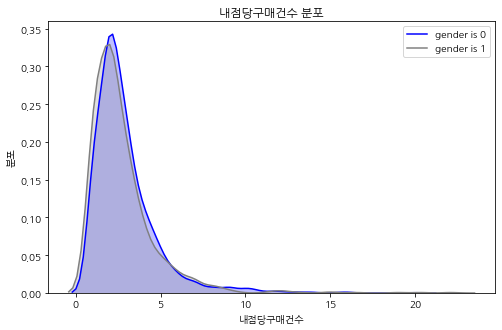

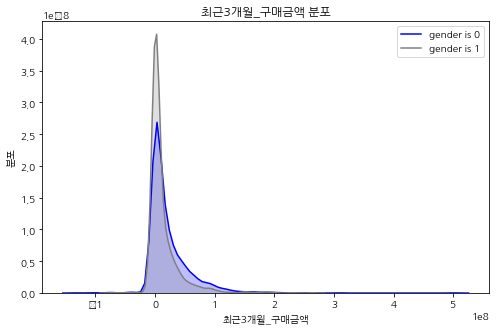

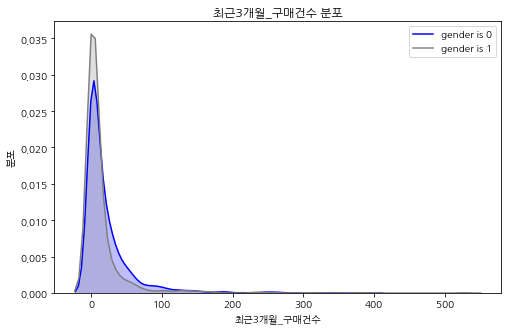

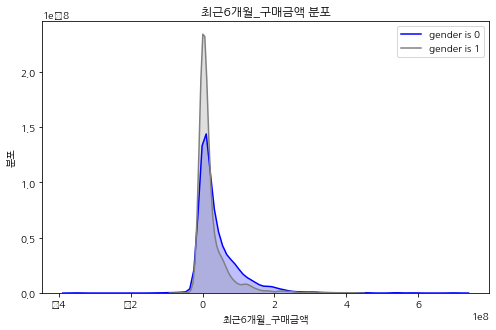

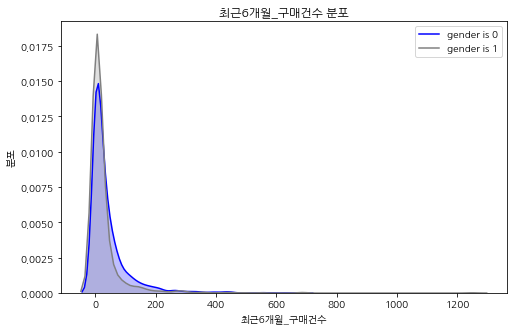

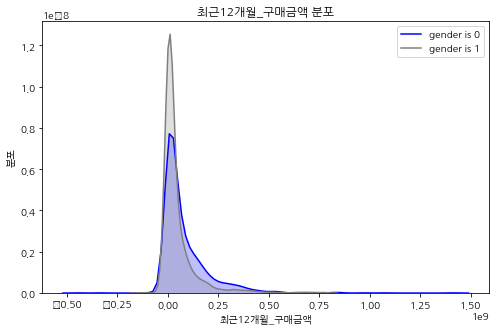

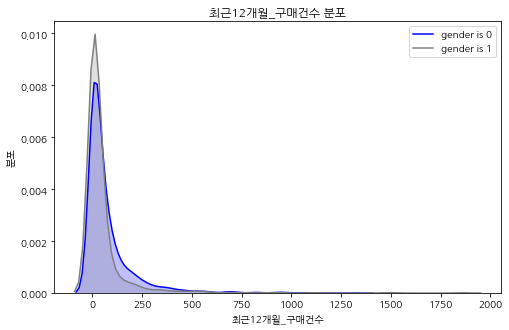

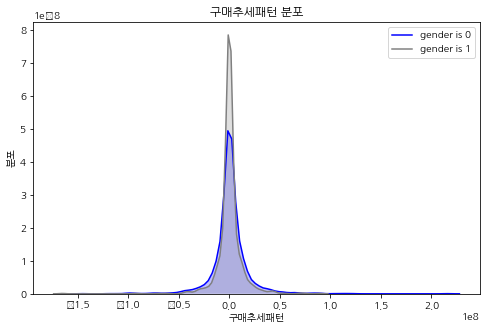

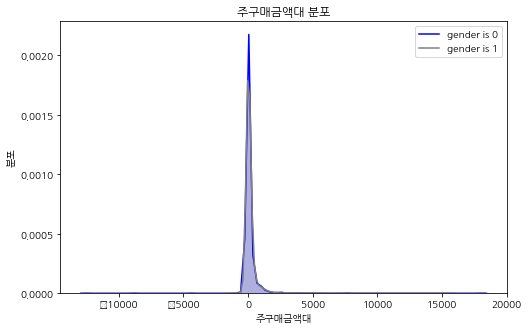

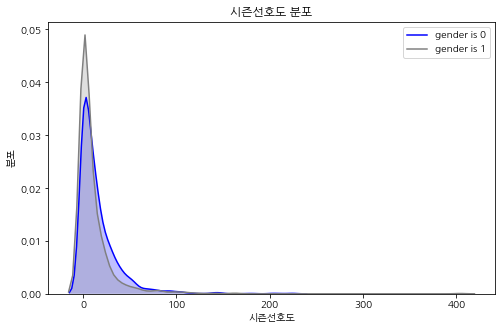

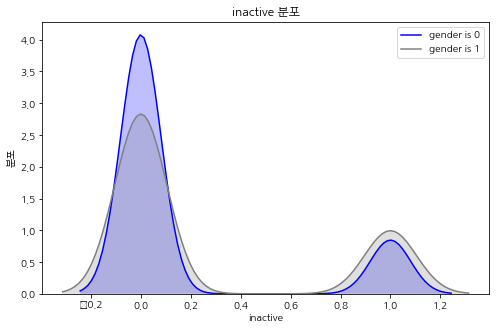

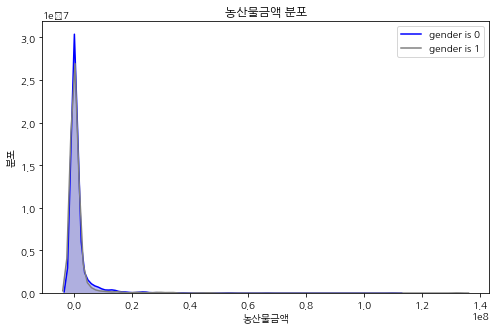

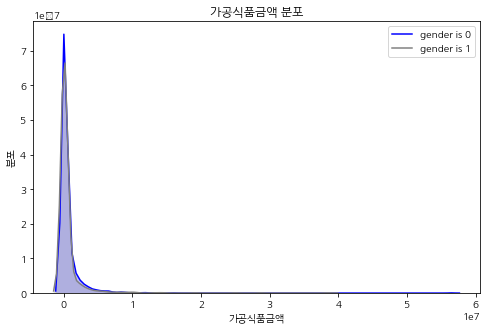

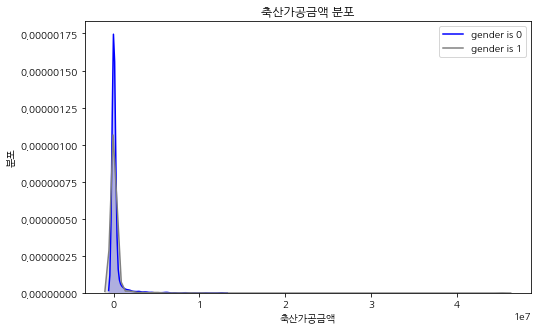

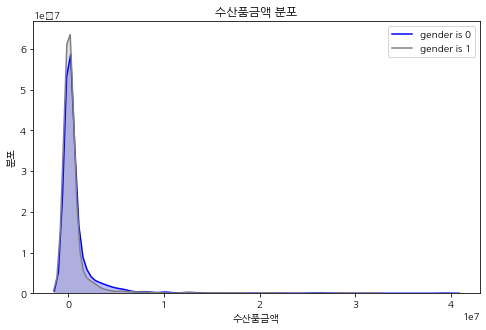

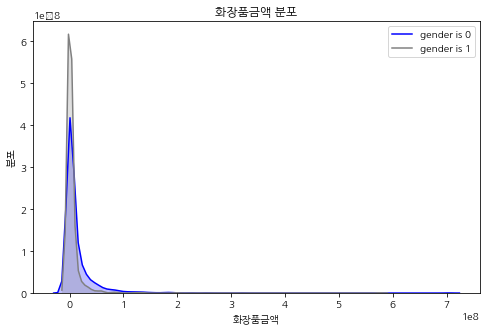

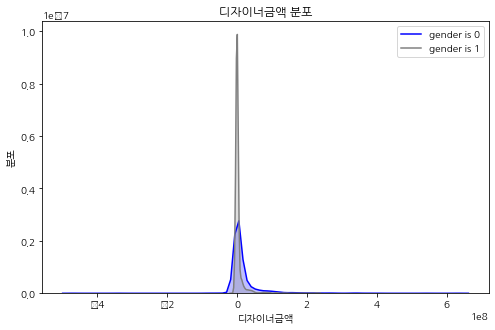

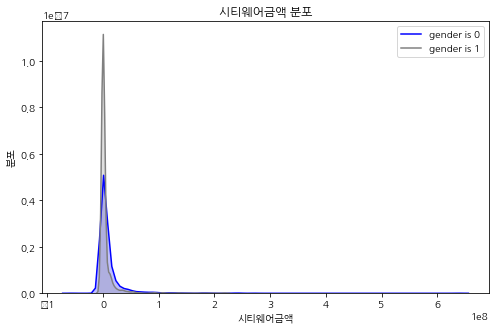

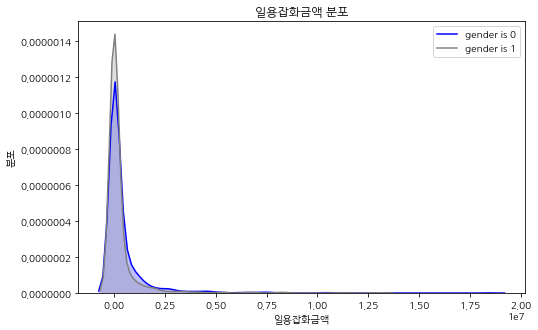

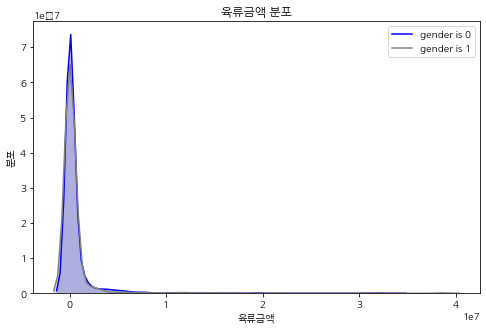

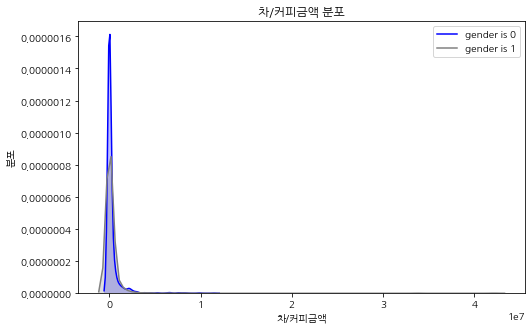

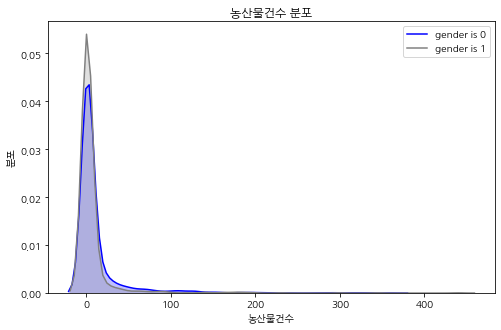

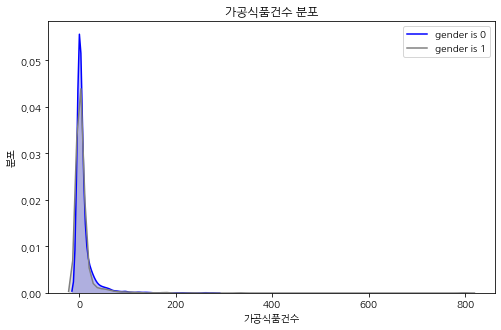

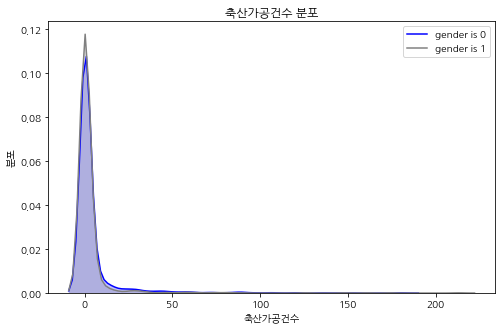

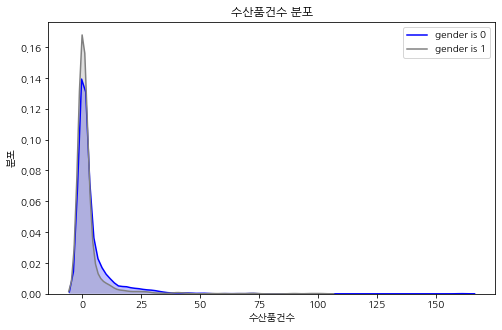

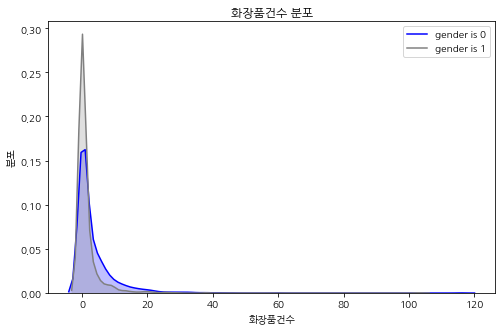

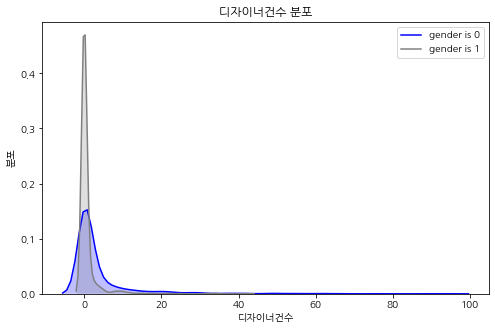

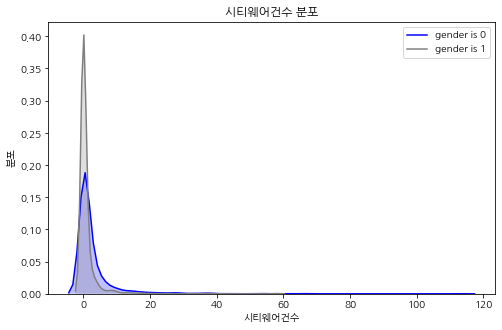

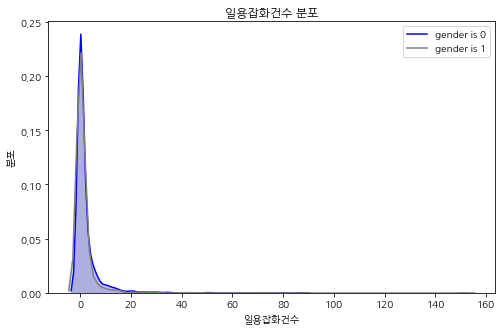

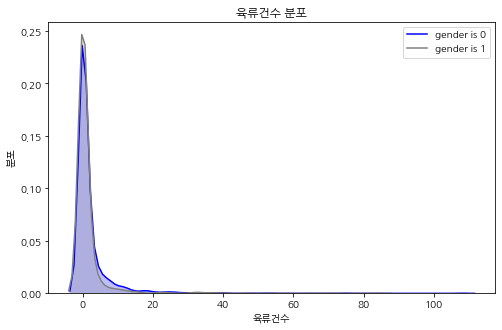

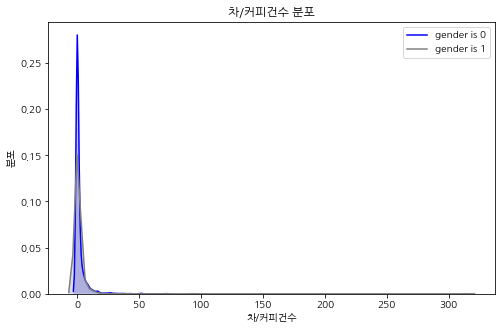

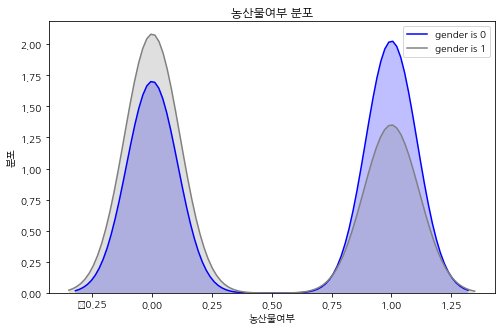

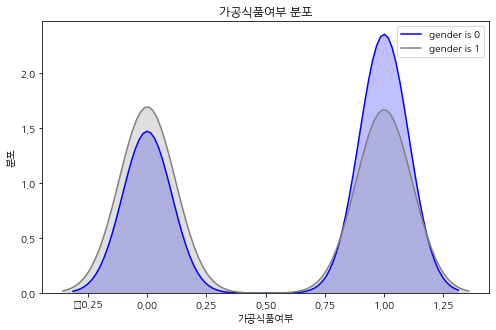

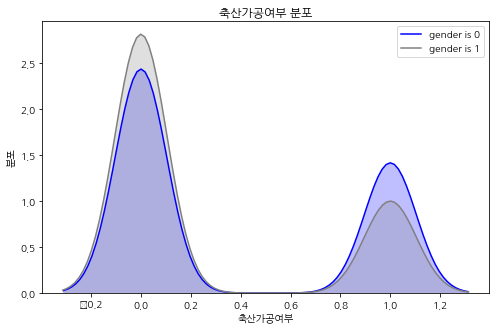

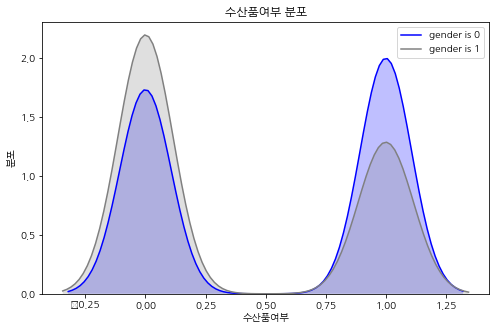

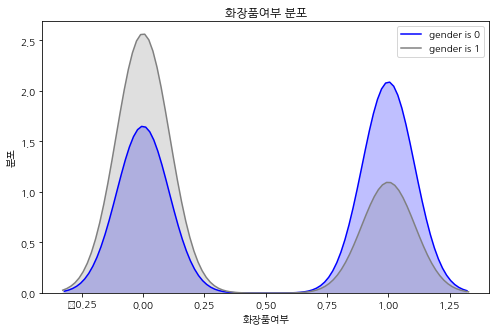

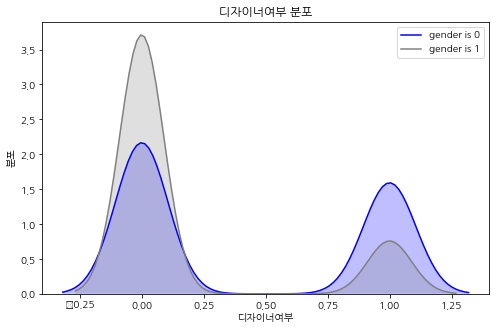

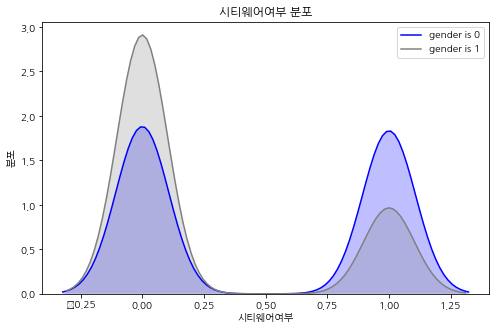

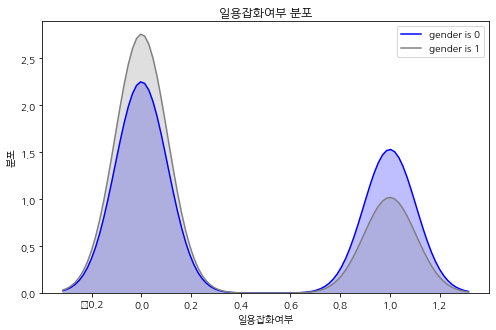

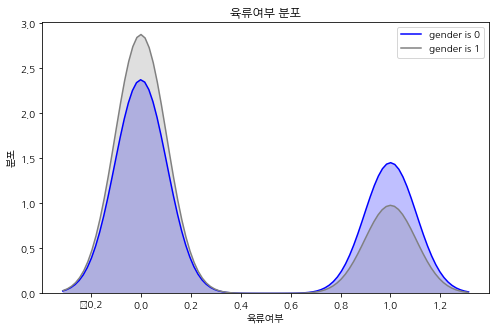

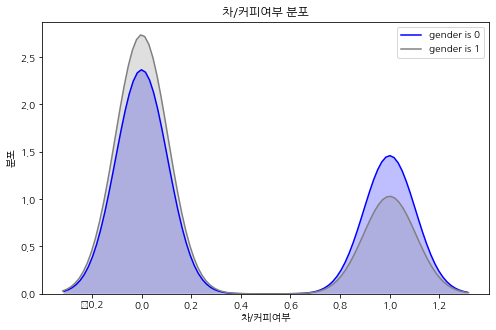

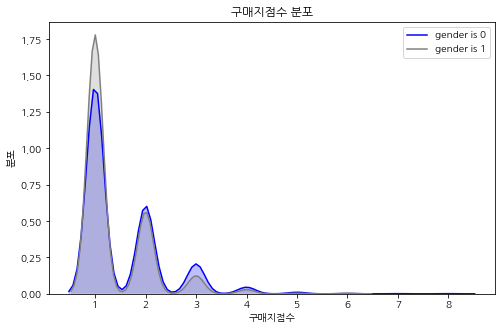

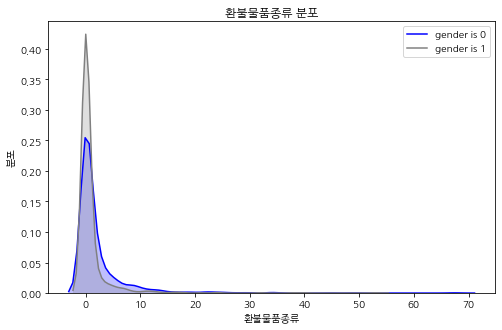

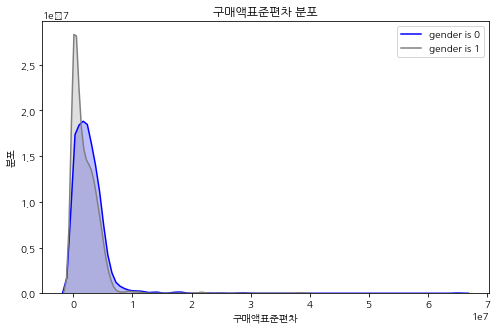

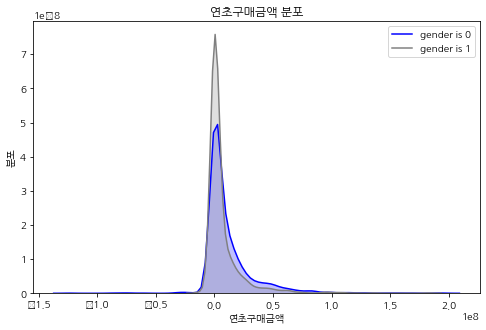

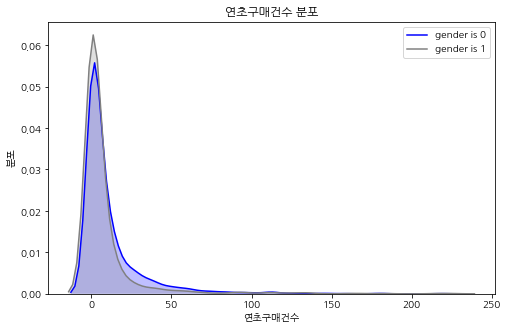

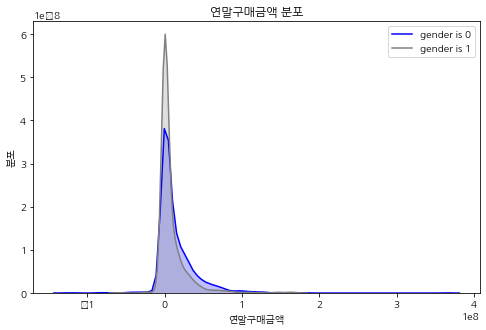

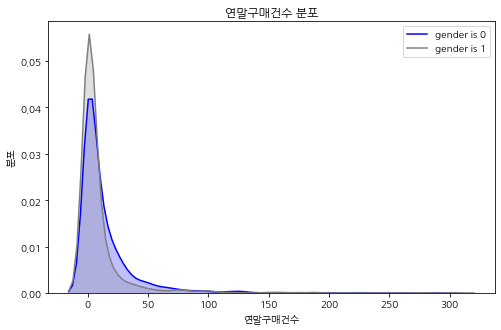

In [17]:
for col in numeric:
    fig = plt.figure(figsize=(8,5),)
    ax =sns.kdeplot(X_train.loc[(X_train['gender']==0),col], color = 'blue',shade = True, label='gender is 0')
    ax =sns.kdeplot(X_train.loc[(X_train['gender']==1),col], color = 'gray',shade =True, label='gender is 1')
    plt.title(col+' 분포')
    plt.xlabel(col)
    plt.ylabel('분포')
    plt.show()

대체로 여성이 구매액, 구매건수, 구매상품종류가 남성에 비해 높다.

평균구매액,내점당구매액, 내점당구매건수, 연초구매건수같은 변수들은 그래프를 통해 보았을 때, 성별에 따른 분포 차이가 거의 없는 것으로 보인다. 

따라서 추후에 그룹화하거나 다른 변수와의 상호작용을 볼 수 있는 파생변수를 생성한다.

또한 구매건수, 환불금액, 환불건수,최근3/6/12월구매금액/건수, 구매추세패턴, top10구매금액/건수, 시즌선호도, 연초/연말 구매금액/건수와 같은 변수들은 분포가 왼쪽으로 치우쳐져있고 오른쪽으로 긴 꼬리를 같고 있기 때문에 분포를 제대로 확안히가기가 어렵다.

따라서 추후 로그 변환한 파생변수를 생성한다.




### Categorical 변수 분포 확인

In [228]:
categoric = X_train.columns[59:62]
categoric.append(X_train.columns[69:71])

Index(['주구매상품_x', '주구매지점', '상품구매순서', '주구매상품_y', '선호계절'], dtype='object')

1. 주구매 상품x: 가장 많이 구매한 상품(gds_grp_mclas_nm)

In [230]:
X_train.groupby(['주구매상품_x'])['gender'].mean().reset_index().sort_values(by='gender').head(n=5)

,주구매상품_x,gender
11,디자이너,0.132653
12,란제리/내의,0.200000
22,시티웨어,0.213270
28,일용잡화,0.257143
9,농산물,0.266272


In [231]:
X_train.groupby(['주구매상품_x'])['gender'].mean().reset_index().sort_values(by='gender').tail(n=5)

,주구매상품_x,gender
6,남성 캐주얼,0.774194
8,남성정장,0.777778
30,주류,0.875000
33,준보석/시계,1.000000
25,악기,1.000000


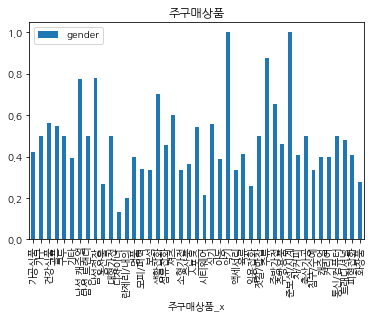

In [14]:
X_train[['주구매상품_x','gender']].groupby('주구매상품_x').mean().plot.bar()
plt.title('주구매상품')
plt.xticks(rotation='vertical')
plt.show()

여성의 경우 디자이너, 란제리, 시티웨어등의 품목에서 비율이 높게 나타나며, 남성의 경우 악기, 준보석/시계, 주류등의 품목에서 비율이 높게 나타난다.


2. 주 구매 지점

In [232]:
X_train.groupby(['주구매지점'])['gender'].mean().reset_index().sort_values(by='gender').head()

,주구매지점,gender
12,상인점,0.000000
21,창원점,0.250000
0,강남점,0.253425
10,부평점,0.298246
3,노원점,0.318681


In [233]:
X_train.groupby(['주구매지점'])['gender'].mean().reset_index().sort_values(by='gender').tail()

,주구매지점,gender
17,인천점,0.485714
16,울산점,0.500000
14,안양점,0.535714
4,대구점,0.714286
20,전주점,1.000000


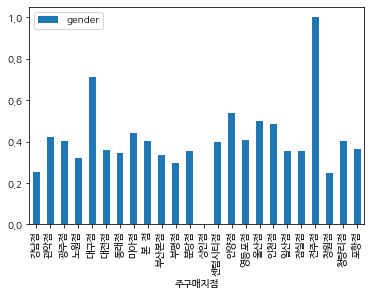

In [0]:
X_train[['주구매지점','gender']].groupby('주구매지점').mean().plot.bar()
plt.xlabel('주구매지점', fontproperties = fontprop)
plt.xticks(rotation='vertical', fontproperties = fontprop)
plt.show()

주구매지점별로 성별의 비율에 차이가 있다.

상인점과 전주점같은 경우는 성별의 비율이 모두 여성이거나 모두 남성이라는 점이 특이점이다.

3. 상품별 구매순서

In [235]:
X_train.groupby(['상품구매순서'])['gender'].mean().reset_index().sort_values(by='gender').head()

,상품구매순서,gender
11,디자이너,0.125926
26,액세서리,0.142857
15,보석,0.166667
12,란제리/내의,0.176471
7,남성 트랜디,0.200000


In [236]:
X_train.groupby(['상품구매순서'])['gender'].mean().reset_index().sort_values(by='gender').tail()

,상품구매순서,gender
30,주류,0.666667
39,통신/컴퓨터,0.666667
8,남성정장,0.750000
6,남성 캐주얼,0.750000
25,악기,1.000000


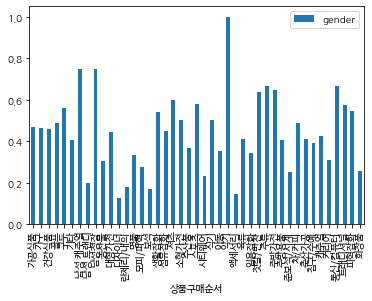

In [0]:
X_train[['상품구매순서','gender']].groupby('상품구매순서').mean().plot.bar()
plt.xlabel('상품구매순서', fontproperties = fontprop)
plt.xticks(rotation='vertical', fontproperties = fontprop)
plt.show()

여성은 디자이너, 액세서리, 보석등 패션관련 상품을 제일 먼저 구매했으며, 남성은 악기, 남성캐쥬얼, 남성정장등 남성 의류 상품을 제일 먼저 구매하였다. 두 성별 모두 패션과 관련된 상품을 가장 먼저 구매하는 횟수가 많은 것으로 보인다.

4. 주구매상품_y : 가장 많이 구매하는 상품의 소분류 (gds_grp_nm)

In [237]:
X_train.groupby(['주구매상품_y'])['gender'].mean().reset_index().sort_values(by='gender').head()

,주구매상품_y,gender
191,휴지류,0.0
119,어묵,0.0
121,엘리든직매입,0.0
24,고정행사(골프),0.0
155,중식델리,0.0


In [238]:
X_train.groupby(['주구매상품_y'])['gender'].mean().reset_index().sort_values(by='gender').tail()

,주구매상품_y,gender
154,주방잡화,1.0
156,즉석구이김류,1.0
17,건강가전,1.0
164,초밥,1.0
40,김치냉장고,1.0


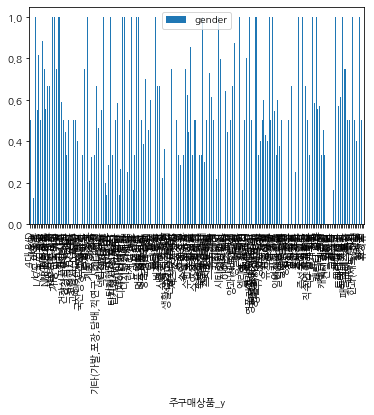

In [0]:
X_train[['주구매상품_y','gender']].groupby('주구매상품_y').mean().plot.bar()
plt.xlabel('주구매상품_y')
plt.xticks(rotation='vertical')
plt.show()

여성의 경우 휴지류, 어묵, 엘리든직매입등의 상품을 주로 구매했으며 남성의 경우 김치냉장고, 초밥, 건강가전등의 상품을 주로 많이 구매하였다

변수의 범주도 너무 많으며 결과가 직관적으로 의미있는 것으로는 보이지 않는다.

5. 가장 선호하는 계절

In [239]:
X_train.groupby(['선호계절'])['gender'].mean().reset_index().sort_values(by='gender')

,선호계절,gender
0,가을,0.339141
3,여름,0.366548
1,겨울,0.396786
2,봄,0.399189


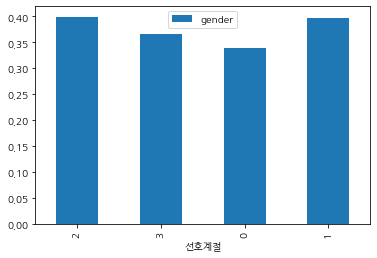

In [0]:
X_train[['선호계절','gender']].groupby('선호계절').mean().reset_index().loc[[2,3,0,1],:].plot.bar()
plt.xlabel('선호계절')
plt.xticks(rotation='vertical')
plt.show()

# 봄, 여름, 가을, 겨울 순으로 정렬하기!

여성의 경우 가을과 여름, 남성의 경우 봄과 겨울에 가장 많이 구매하였다.

그러나 계절별로 성별의 비율 차이가 미미하며 의미있는 변수라고는 할 수 없다.

### 종속변수와의 상관관계 확인

In [0]:
numeric = X_train.columns[1:59]
numeric = numeric.append(X_train.columns[62:69])
numeric = numeric.append(X_train.columns[71:72])

In [0]:
X_train[numeric].corr()[['gender']].sort_values(by='gender')[:10]

,gender
디자이너여부,-0.262143
화장품여부,-0.251880
시티웨어여부,-0.241426
구매상품종류3,-0.202234
구매상품종류2,-0.190837
디자이너건수,-0.186863
최대구매액,-0.186729
화장품건수,-0.171571
구매상품종류1,-0.170388
수산품여부,-0.161448


종속변수와 상관관계가 높은 유의미한 10개의 변수들은 

[디자이너여부, 화장품여부, 시티웨어여부, 구매상품종류3, 구매상품종류2, 디자이너건수, 최대구매액, 화장품건수, 구매상품종류1, 수산품여부]

이다.

### 변수간의 상관관계

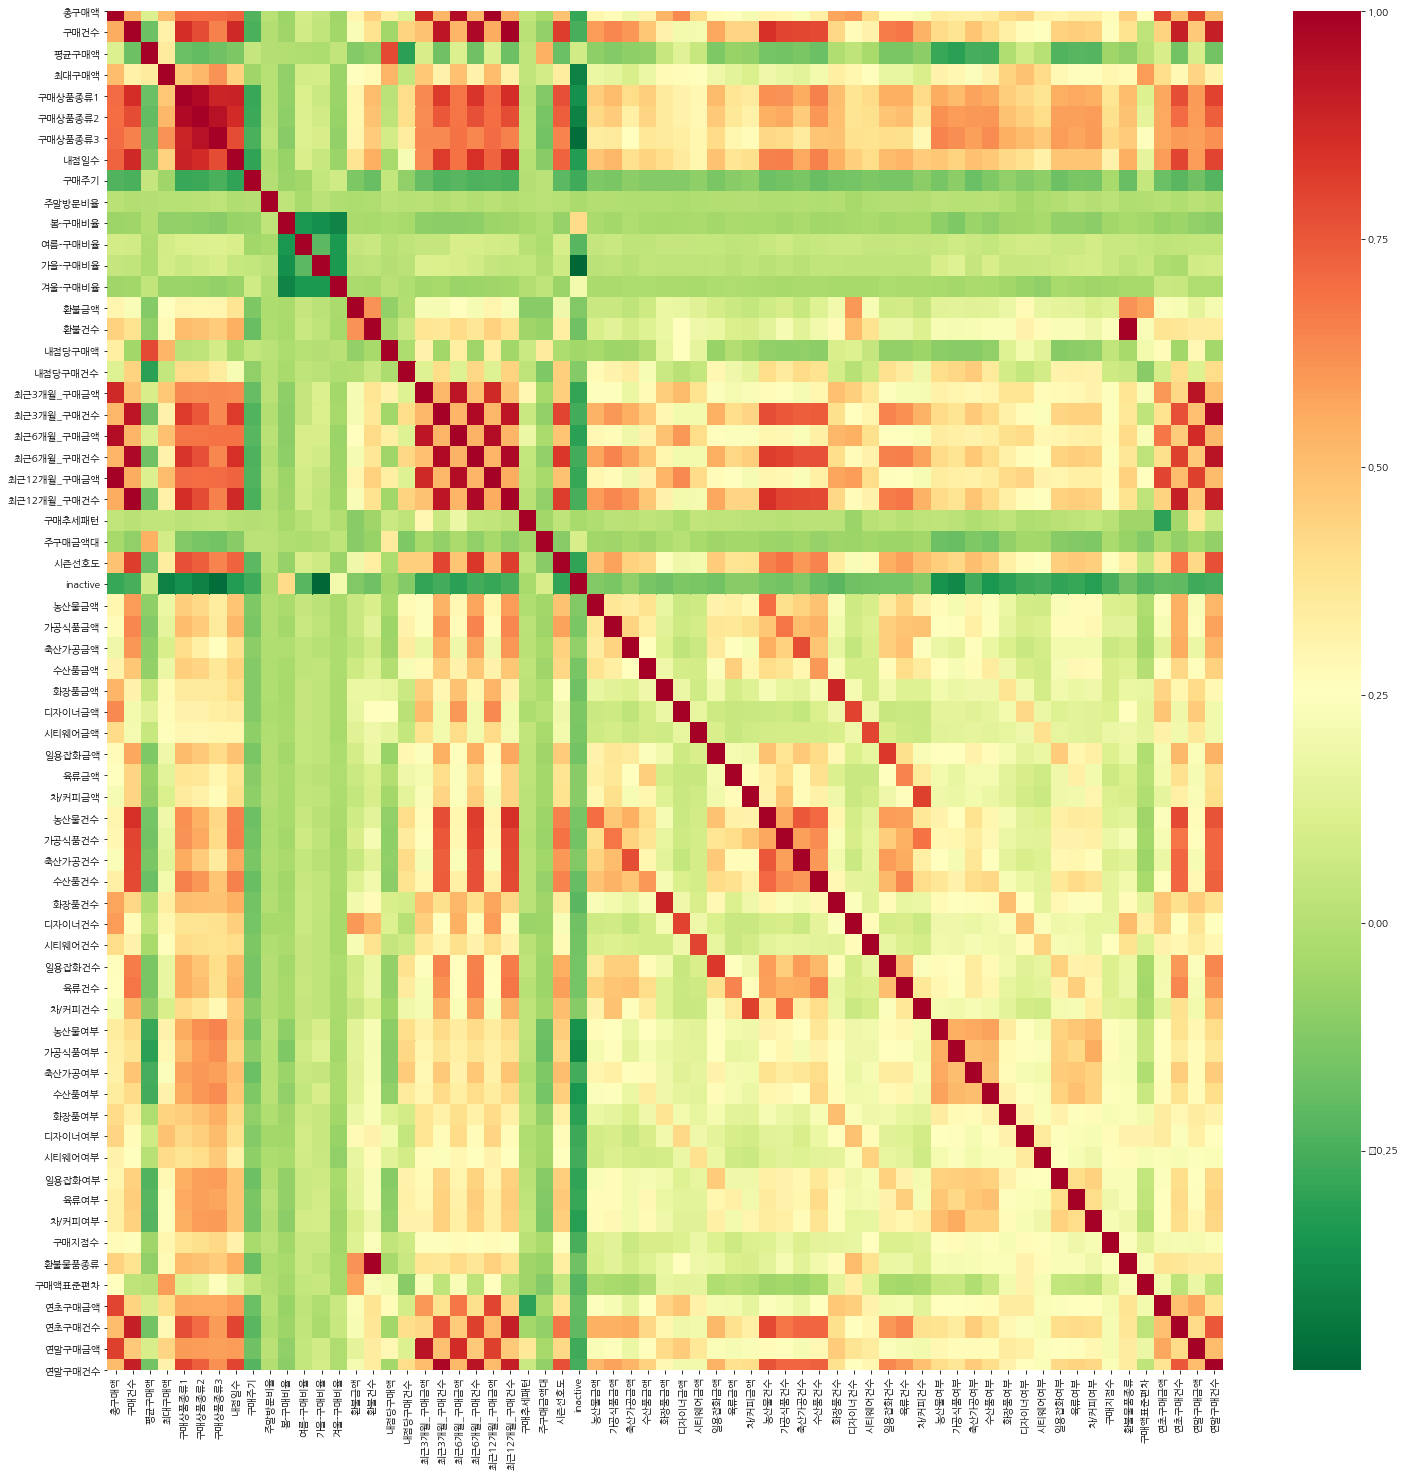

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(data=X_train[numeric].corr(),cmap='RdYlGn_r')
plt.show()

대부분 상관관계가 낮으나 일부 feature들 간의 상관관계가 높게 나오기도 한다.

[총구매액, 구매건수, 구매상품종류1,2,3, 내점일수, 최근 3~12 개월 구매금액/건수, 연초/연말 구매금액/건수, 농산/가공/축산/수산품 구매건수]

## part 2. Feature engineering

### 새로운 파생변수 생성

1. 변수 로그변환

    - 구매건수, 환불금액, 환불건수,최근3/6/12월구매금액/건수, 구매추세패턴, top10구매금액/건수, 시즌선호도

1-1 구매건수 로그 변환

In [19]:
import math

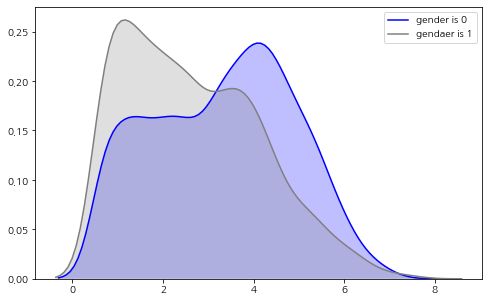

In [20]:
X_train['구매건수로그'] = X_train['구매건수'].apply(lambda x: math.log(x+1))
X_test['구매건수로그'] = X_test['구매건수'].apply(lambda x: math.log(x+1))

fig = plt.figure(figsize=(8,5),)
ax =sns.kdeplot(X_train.loc[(X_train.구매건수 > 0) & (X_train['gender']==0),'구매건수로그'], color = 'blue',shade = True, label='gender is 0')
ax =sns.kdeplot(X_train.loc[(X_train.구매건수 > 0) & (X_train['gender']==1),'구매건수로그'], color = 'gray',shade =True, label='gendaer is 1')

구매건수에 로그를 취한 값이 클수록  여성일 확률이 높다.

또한 구매건수에 로그를 취한 값이 0에서 3 사이일 때 남성일 확률이 높다.

1-2 환불금액 로그변환

In [21]:
X_train.환불금액.describe()
# 음수인 값이 없으므로 log변환 가능

count    3.500000e+03
mean     8.289786e+06
std      3.010204e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.642250e+06
max      5.637530e+08
Name: 환불금액, dtype: float64

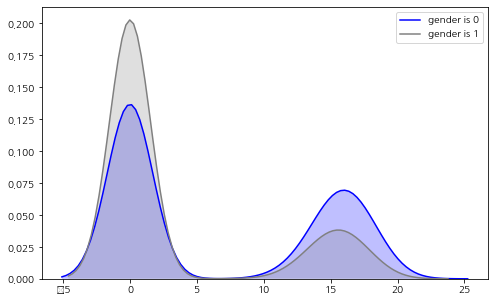

In [22]:
X_train['환불금액로그'] = X_train['환불금액'].apply(lambda x: math.log(x+1))
X_test['환불금액로그'] = X_test['환불금액'].apply(lambda x: math.log(x+1))

fig = plt.figure(figsize=(8,5),)
ax = sns.kdeplot(X_train.loc[X_train.gender==0,'환불금액로그'],color='blue',shade=True,label='gender is 0')
ax = sns.kdeplot(X_train.loc[X_train.gender==1,'환불금액로그'],color='gray',shade=True,label='gender is 1')


환불금액에 로그를 취한 값이 클 수록 여성일 확률이 높다.

1-3 환불건수 로그변환

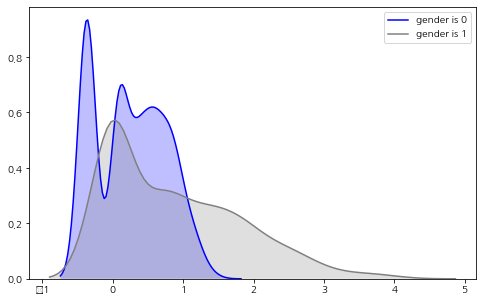

In [23]:
X_train['환불건수로그'] = X_train['환불건수'].apply(lambda x: math.log(x+1))
X_test['환불건수로그'] = X_test['환불건수'].apply(lambda x: math.log(x+1))

fig = plt.figure(figsize=(8,5),)
ax = sns.kdeplot(X_train.loc[(X_train.환불건수 > 0) & (X_train.gender == 0), '환불건수로그'].apply(lambda x: math.log(x)),
                 color='blue',shade=True,label='gender is 0')
ax = sns.kdeplot(X_train.loc[(X_train.환불건수 > 0) & (X_train.gender == 1), '환불건수'].apply(lambda x: math.log(x)),
                 color='gray',shade=True, label ='gender is 1')

다른 변수들과는 다르게, 환불건수에 로그를 취한 값이 클 수록 남성일 확률이 높다.

특히 남성을 구분할 때 유의미한 변수가 될 수 있을 것으로 보인다.

1-4 최근 3/6/12 개월 구매 금액

In [24]:
X_train.iloc[:,[19,21,23]].describe()

,최근3개월_구매금액,최근6개월_구매금액,최근12개월_구매금액
count,3.500000e+03,3.500000e+03,3.500000e+03
mean,1.883378e+07,3.473491e+07,6.792802e+07
std,3.302386e+07,5.791656e+07,1.104445e+08
min,-1.316515e+08,-3.483891e+08,-4.432917e+08
25%,0.000000e+00,3.120000e+05,4.539875e+06
50%,5.208300e+06,1.190844e+07,2.362645e+07
75%,2.530458e+07,4.705379e+07,8.621250e+07
max,5.022371e+08,6.994266e+08,1.412023e+09


음수에는 로그변환을 취할 수 없기 때문에, 변수에 음수가 있다면 해당 변수에 음수의 최소값+1을 더하여 모든 값을 양수로 만들어 준 다음 로그변환을 해야 한다.
그러나 최근 3/6/12개월 구매금액 변수에 큰 값을 더해줘야 하기 때문에, 로그변환 이전과 마찬가지로 왼쪽에 치우진 분포가 나오며 로그변환의 의미가 없으므로 생략한다.

1-5 최근 3/6/12 개월 구매 건수

In [25]:
X_train.columns[[20,22,24]]

Index(['최근3개월_구매건수', '최근6개월_구매건수', '최근12개월_구매건수'], dtype='object')

In [26]:
for col in X_train.columns[[20,22,24]]:
    X_train[col+'로그'] = X_train[col].apply(lambda x : math.log(x+1))
    X_test[col+'로그'] = X_test[col].apply(lambda x : math.log(x+1))

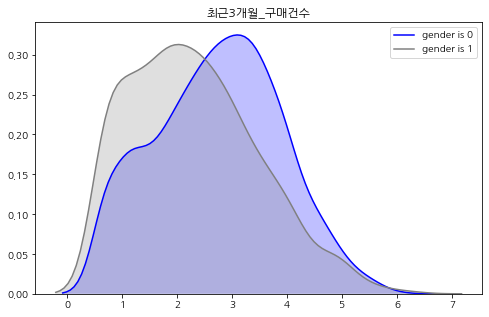

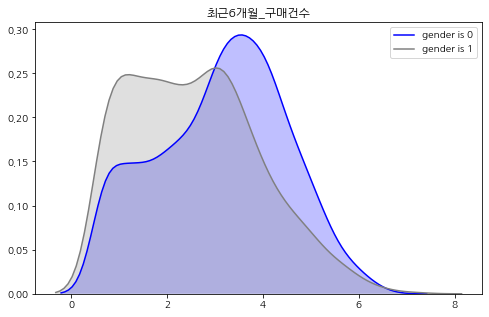

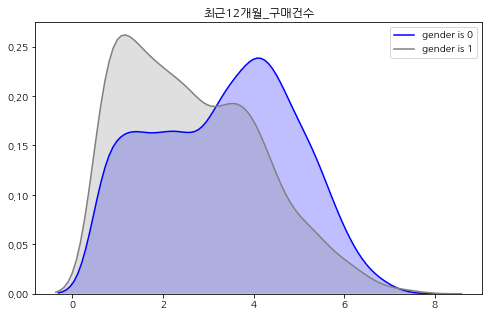

In [27]:
for col in X_train.columns[[20,22,24]]:
    fig = plt.figure(figsize=(8,5),)
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==0), col+'로그'], 
                   color='blue', shade = True, label='gender is 0')
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==1), col+'로그'],
                   color='gray', shade = True, label='gender is 1')
    plt.title(col)
    plt.show()

최근 3/6/12 개월 구매 건수에 로그를 취한 값은 성별에 따라 분포가 확연히 차이가 난다.

최근 m개월내 구매 건수가 클 수록 여성일 확률이 높다.

1-4 top10 품목별 구매 건수

In [28]:
X_train.columns[39:49]

Index(['농산물건수', '가공식품건수', '축산가공건수', '수산품건수', '화장품건수', '디자이너건수', '시티웨어건수',
       '일용잡화건수', '육류건수', '차/커피건수'],
      dtype='object')

In [29]:
for col in X_train.columns[39:49]:
    X_train[col+'로그'] = X_train[col].apply(lambda x : math.log(x+1))
    X_test[col+'로그'] = X_test[col].apply(lambda x : math.log(x+1))

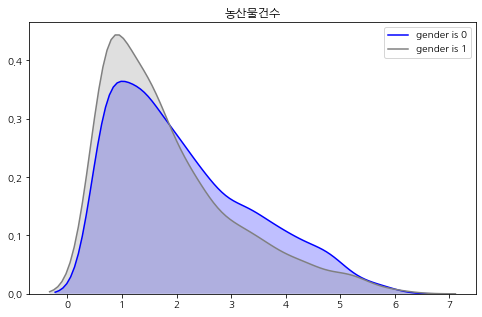

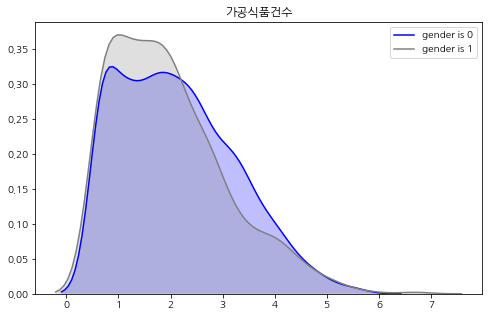

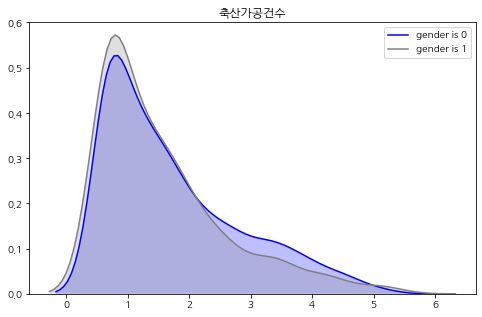

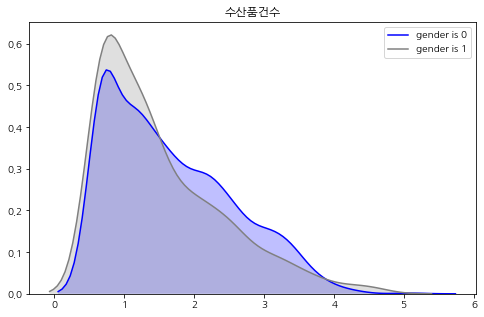

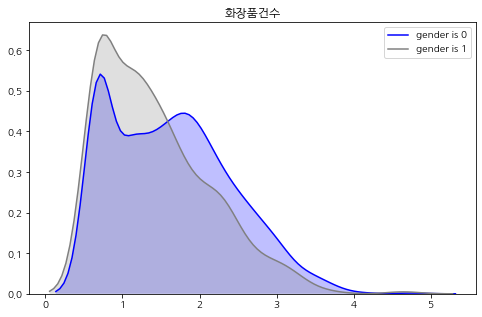

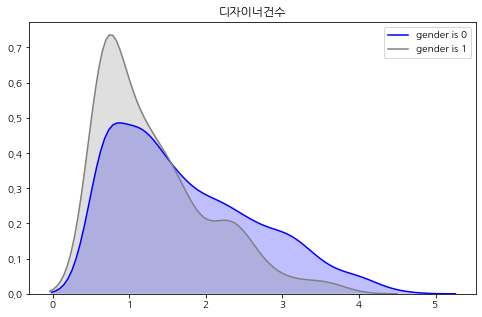

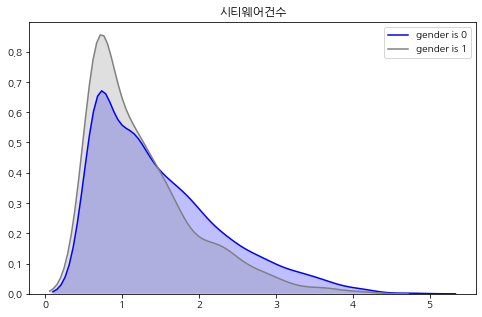

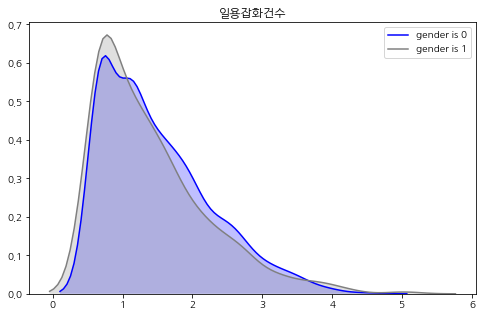

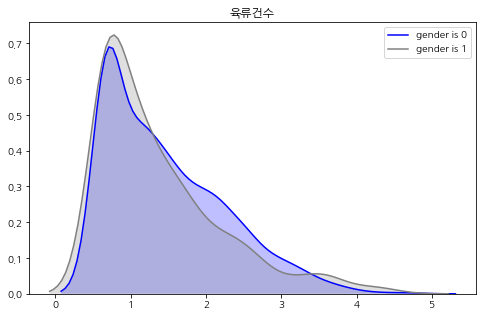

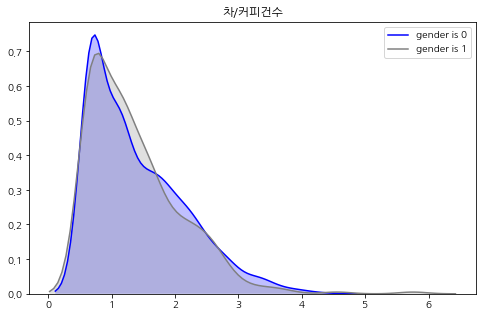

In [30]:
for col in X_train.columns[39:49]:
    fig = plt.figure(figsize=(8,5),)
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==0), col+'로그'],
                   color='blue', shade = True,label='gender is 0')
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==1), col+'로그'],
                   color='gray', shade = True,label='gender is 1')
    plt.title(col)
    plt.show()

성별에 따라 분포가 다른 물품과 다르지 않은 물품이 구분된다.

[축산가공, 일용잡화, 육류, 차/커피] 품목은 구매건수에 로그를 취해도 성별에 따라 분포가 크게 다르지 않는 것으로 보인다.

해당 변수들은 범주화하고 변수들간의 상호작용을 나타낼 수 있는 피쳐를 만들도록 한다.

1-5 연초/연말 구매 건수

In [31]:
X_train.columns[[66,68]]

Index(['연초구매건수', '연말구매건수'], dtype='object')

In [32]:
for col in X_train.columns[[66,68]]:
    X_train[col+'로그'] = X_train[col].apply(lambda x : math.log(x+1))
    X_test[col+'로그'] = X_test[col].apply(lambda x : math.log(x+1))

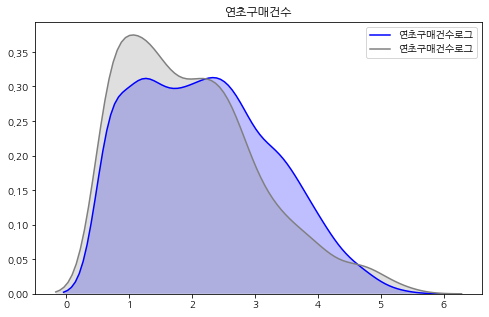

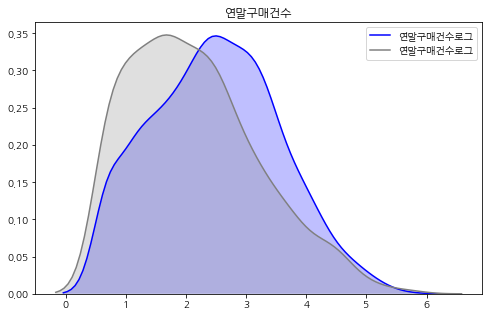

In [33]:
for col in X_train.columns[[66,68]]:
    fig = plt.figure(figsize=(8,5),)
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==0), col+'로그'], color='blue', shade = True)
    ax = sns.kdeplot(X_train.loc[(X_train[col]>0) & (X_train.gender ==1), col+'로그'], color='gray', shade = True)
    plt.title(col)
    plt.show()

1-6. 시즌선호도

In [34]:
X_train['시즌선호도로그'] = X_train['시즌선호도'].apply(lambda x : math.log(x+1))
X_test['시즌선호도로그'] = X_test['시즌선호도'].apply(lambda x : math.log(x+1))

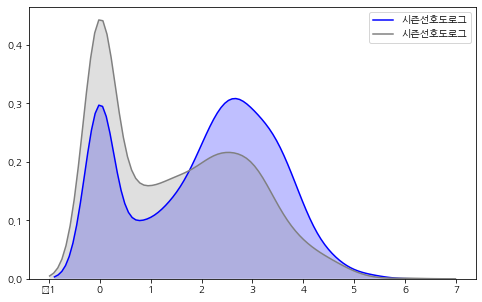

In [35]:
fig = plt.figure(figsize=(8,5),)
ax = sns.kdeplot(X_train.loc[(X_train.gender == 0), '시즌선호도로그'], color='blue', shade = True)
ax = sns.kdeplot(X_train.loc[(X_train.gender == 1), '시즌선호도로그'], color='gray', shade = True)
plt.show()

2. 연속형변주 범주형변수로 변환

2-1. 평균구매액 범주형 변수로 변환

In [36]:
X_train[X_train.평균구매액 <= 0].gender.mean()

# 평균구매액이 0 이하일 수록 여성일 확률이 높음
# 예외의 케이스이므로 편균구매액이 0 이하인 행들은 별도의 그룹으로 지정

0.1724137931034483

In [37]:
X_train.loc[X_train.평균구매액 > 0,'평균구매액2'] = pd.qcut(X_train[X_train.평균구매액 > 0].평균구매액,5)
X_train[X_train.평균구매액 > 0].groupby(['평균구매액2'])['gender'].mean().reset_index()
#train.groupby(['총구매액2'])['gender'].mean().reset_index()

# 평균구매액이 양수인 경우에는, 평균구매금액이 많아질 수록 여성일 확률이 높아지는 것을 확인할 수 있음.

,평균구매액2,gender
0,"(4999.999, 349615.0]",0.440288
1,"(349615.0, 840848.0]",0.373199
2,"(840848.0, 1512082.0]",0.347262
3,"(1512082.0, 2660518.0]",0.357349
4,"(2660518.0, 13050000.0]",0.370317


In [38]:
# 변수 변환
# 평균구매금액이 0 이하인 그룹은 예외 케이스로 하고
# 평균구매금액이 양수일 때는 5개의 그룹으로 분류한다.

X_train['평균구매액_cat']=pd.Series()

X_train.loc[X_train.평균구매액 <= 0, '평균구매액_cat'] = 0
X_train.loc[(X_train.평균구매액 > 0) & (X_train.평균구매액 <=  350000) , '평균구매액_cat'] = 1
X_train.loc[(X_train.평균구매액 > 350000) & (X_train.평균구매액 <=  840000) , '평균구매액_cat'] = 2
X_train.loc[(X_train.평균구매액 > 840000) & (X_train.평균구매액 <=  1500000) , '평균구매액_cat'] = 3
X_train.loc[(X_train.평균구매액 > 1500000) & (X_train.평균구매액 <=   2700000) , '평균구매액_cat'] = 4
X_train.loc[(X_train.평균구매액 > 2700000), '평균구매액_cat'] = 5

X_test['평균구매액_cat']=pd.Series()
X_test.loc[X_test.평균구매액 <= 0, '평균구매액_cat'] = 0
X_test.loc[(X_test.평균구매액 > 0) & (X_test.평균구매액 <=  350000) , '평균구매액_cat'] = 1
X_test.loc[(X_test.평균구매액 > 350000) & (X_test.평균구매액 <=  840000) , '평균구매액_cat'] = 2
X_test.loc[(X_test.평균구매액 > 840000) & (X_test.평균구매액 <=  1500000) , '평균구매액_cat'] = 3
X_test.loc[(X_test.평균구매액 > 1500000) & (X_test.평균구매액 <=   2700000) , '평균구매액_cat'] = 4
X_test.loc[(X_test.평균구매액 > 2700000), '평균구매액_cat'] = 5

* 남녀 비율 확인

In [39]:
X_train.groupby(['평균구매액_cat'])['gender'].mean().reset_index()

,평균구매액_cat,gender
0,0.0,0.172414
1,1.0,0.440288
2,2.0,0.371387
3,3.0,0.347889
4,4.0,0.351314
5,5.0,0.378338


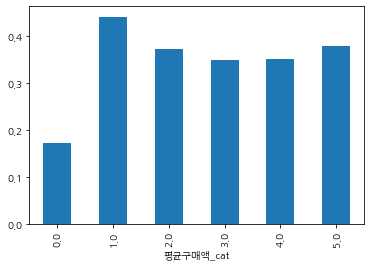

In [40]:
X_train.groupby(['평균구매액_cat'])['gender'].mean().plot.bar()


평균구매액이 0 이하인 그룹에 속하면 여성일 확률이 높다.

평균구매금액이 양수인 경우에는 높은 그룹일 수록 여성일 확률이 높다.

또한 그룹이 1일 때 남성일 확률이 가장 높다. 

2-2 내점당구매액 범주형 변수로 변환

In [41]:
X_train[X_train.내점당구매액 <= 0].gender.mean()

# 내점당구매액이 0 이하인 경우에는 여성일 확률이 높음
# 예외의 케이스이므로 내점당구매액이 0 이하인 행들은 별도의 그룹으로 지정

0.1724137931034483

In [42]:
X_train['내점당구매액2'] = pd.Series
X_train.loc[X_train.내점당구매액 > 0,'내점당구매액2'] = pd.qcut(X_train[X_train.내점당구매액 > 0].내점당구매액,5)
X_train[X_train.내점당구매액 > 0].groupby(['내점당구매액2'])['gender'].mean().reset_index()

,내점당구매액2,gender
0,"(4999.999, 975000.0]",0.478448
1,"(975000.0, 2178000.0]",0.394813
2,"(2178000.0, 3643136.842]",0.323232
3,"(3643136.842, 5874103.704]",0.337176
4,"(5874103.704, 30001200.0]",0.354467


In [43]:
# 변수 변환
X_train['내점당구매액_cat']=pd.Series()

X_train.loc[X_train.내점당구매액 <= 0, '내점당구매액_cat'] = 0
X_train.loc[(X_train.내점당구매액 > 0) & (X_train.내점당구매액 <=  980000), '내점당구매액_cat'] = 1
X_train.loc[(X_train.내점당구매액 > 980000) & (X_train.내점당구매액 <=  2180000), '내점당구매액_cat'] = 2
X_train.loc[(X_train.내점당구매액 > 218000) & (X_train.내점당구매액 <=  3600000), '내점당구매액_cat'] = 3
X_train.loc[(X_train.내점당구매액 > 3600000) & (X_train.내점당구매액 <=  5900000), '내점당구매액_cat'] = 4
X_train.loc[X_train.내점당구매액 > 5900000, '내점당구매액_cat'] = 5

X_test['내점당구매액_cat']=pd.Series()
X_test.loc[X_test.내점당구매액 <= 0, '내점당구매액_cat'] = 0
X_test.loc[(X_test.내점당구매액 > 0) & (X_test.내점당구매액 <=  98000), '내점당구매액_cat'] = 1
X_test.loc[(X_test.내점당구매액 > 98000) & (X_test.내점당구매액 <=  2180000), '내점당구매액_cat'] = 2
X_test.loc[(X_test.내점당구매액 > 218000) & (X_test.내점당구매액 <=  3600000), '내점당구매액_cat'] = 3
X_test.loc[(X_test.내점당구매액 > 3600000) & (X_test.내점당구매액 <=  5900000), '내점당구매액_cat'] = 4
X_test.loc[X_test.내점당구매액 > 5900000, '내점당구매액_cat'] = 5

In [44]:
X_train.groupby(['내점당구매액_cat'])['gender'].mean().reset_index()

,내점당구매액_cat,gender
0,0.0,0.172414
1,1.0,0.528409
2,3.0,0.387831
3,4.0,0.336134
4,5.0,0.354559


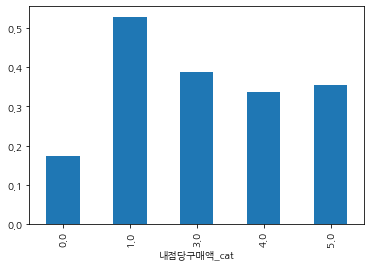

In [45]:
X_train.groupby(['내점당구매액_cat'])['gender'].mean().plot(kind='bar')

평균구매액과 비슷한 양상을 띤다.

그룹이 0이면 여성일 확률이 높으며, 그룹이 0이 아닌 경우, 내점당구매이 높은 그룹에 속할 수록 여성일 확률이 높다.

2-3. 내점당구매건수 범주형 변수로 변환

In [46]:
X_train['내점당구매건수2'] = pd.qcut(X_train.내점당구매건수,3)
X_train.groupby(['내점당구매건수2'])['gender'].mean().reset_index()

# 내점당구매건수가 낮은 그룹일수록 남성일 확률이 높음

,내점당구매건수2,gender
0,"(0.999, 2.0]",0.431579
1,"(2.0, 3.0]",0.334347
2,"(3.0, 22.083]",0.340993


In [47]:
# train 변수 변환

X_train['내점당구매건수_cat']=pd.Series()

X_train.loc[(X_train.내점당구매건수 <= 2) , '내점당구매건수_cat'] = 0
X_train.loc[(X_train.내점당구매건수 > 2) & (X_train.내점당구매건수 <= 3) , '내점당구매건수_cat'] = 1
X_train.loc[(X_train.내점당구매건수 > 3),'내점당구매건수_cat'] = 2

# test 변수 변환

X_test['내점당구매건수_cat']=pd.Series()

X_test.loc[ (X_test.내점당구매건수 <= 2) , '내점당구매건수_cat'] = 0
X_test.loc[(X_test.내점당구매건수 > 2) & (X_test.내점당구매건수 <= 3) , '내점당구매건수_cat'] = 1
X_test.loc[(X_test.내점당구매건수 > 3),'내점당구매건수_cat'] = 2

In [48]:
X_train.groupby(['내점당구매건수_cat'])['gender'].mean().reset_index()

# 내점당 구매건수가 0일 때 남성일 확률이 높음

,내점당구매건수_cat,gender
0,0.0,0.431579
1,1.0,0.334347
2,2.0,0.340993


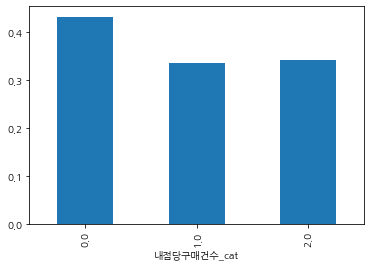

In [49]:
X_train.groupby(['내점당구매건수_cat'])['gender'].mean().plot(kind='bar')

2-4 축산가공건수 범주형변수로 변환

In [50]:
X_train['축산가공건수2'] = pd.qcut(X_train.축산가공건수,10,duplicates='drop')
X_train.groupby(['축산가공건수2'])['gender'].mean().reset_index()

# 내점당구매건수가 낮은 그룹일수록 남성일 확률이 높음

,축산가공건수2,gender
0,"(-0.001, 1.0]",0.403818
1,"(1.0, 2.0]",0.283951
2,"(2.0, 6.0]",0.312500
3,"(6.0, 213.0]",0.248538


In [51]:
# train 변수 변환

X_train['축산가공건수_cat']=pd.Series()

X_train.loc[(X_train.축산가공건수 <= 1) , '축산가공건수_cat'] = 0
X_train.loc[(X_train.축산가공건수 > 1) & (X_train.축산가공건수 <= 2) , '축산가공건수_cat'] = 1
X_train.loc[(X_train.축산가공건수 > 2) & (X_train.축산가공건수 <= 6) , '축산가공건수_cat'] = 2
X_train.loc[(X_train.축산가공건수 > 6),'축산가공건수_cat'] = 3

# test 변수 변환

X_test['축산가공건수_cat']=pd.Series()

X_test.loc[(X_test.축산가공건수 <= 1) , '축산가공건수_cat'] = 0
X_test.loc[(X_test.축산가공건수 > 1) & (X_test.축산가공건수 <= 2) , '축산가공건수_cat'] = 1
X_test.loc[(X_test.축산가공건수 > 2) & (X_test.축산가공건수 <= 6) , '축산가공건수_cat'] = 2
X_test.loc[(X_test.축산가공건수 > 6),'축산가공건수_cat'] = 3

In [52]:
X_train.groupby(['축산가공건수_cat'])['gender'].mean().reset_index()

# 축산가공건수의 그룹이 0일 때 남성일 확률이 높음
# but 그룹 간 큰 비율의 차이는 없음 (특히 1과 2)

,축산가공건수_cat,gender
0,0.0,0.403818
1,1.0,0.283951
2,2.0,0.312500
3,3.0,0.248538


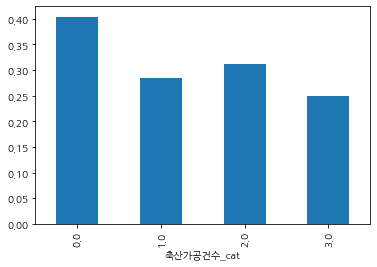

In [53]:
X_train.groupby(['축산가공건수_cat'])['gender'].mean().plot(kind='bar')

2-5 일용잡화건수 범주형 변수로 변환

In [54]:
X_train['일용잡화건수2'] = pd.qcut(X_train.일용잡화건수,15,duplicates='drop')
X_train.groupby('일용잡화건수2')['gender'].mean().reset_index()

,일용잡화건수2,gender
0,"(-0.001, 1.0]",0.413399
1,"(1.0, 2.0]",0.262295
2,"(2.0, 4.0]",0.286920
3,"(4.0, 7.0]",0.234940
4,"(7.0, 151.0]",0.261062


In [55]:
# train 변수 변환

X_train['일용잡화건수_cat']=pd.Series()

X_train.loc[ (X_train.일용잡화건수 <= 1) , '일용잡화건수_cat'] = 0
X_train.loc[(X_train.일용잡화건수 > 1) & (X_train.일용잡화건수 <= 2) , '일용잡화건수_cat'] = 1
X_train.loc[(X_train.일용잡화건수 > 2) & (X_train.일용잡화건수 <= 4) , '일용잡화건수_cat'] = 2
X_train.loc[(X_train.일용잡화건수 > 4) & (X_train.일용잡화건수 <= 7) , '일용잡화건수_cat'] = 3
X_train.loc[(X_train.일용잡화건수 > 7),'일용잡화건수_cat'] = 4

# test 변수 변환

X_test['일용잡화건수_cat']=pd.Series()

X_test.loc[(X_test.일용잡화건수 <= 1) , '일용잡화건수_cat'] = 0
X_test.loc[(X_test.일용잡화건수 > 1) & (X_test.일용잡화건수 <= 2) , '일용잡화건수_cat'] = 1
X_test.loc[(X_test.일용잡화건수 > 2) & (X_test.일용잡화건수 <= 4) , '일용잡화건수_cat'] = 2
X_test.loc[(X_test.일용잡화건수 > 4) & (X_test.일용잡화건수 <= 7) , '일용잡화건수_cat'] = 3
X_test.loc[(X_test.일용잡화건수 > 7),'일용잡화건수_cat'] = 4

In [56]:
X_test

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,...,육류건수로그,차/커피건수로그,연초구매건수로그,연말구매건수로그,시즌선호도로그,평균구매액_cat,내점당구매액_cat,내점당구매건수_cat,축산가공건수_cat,일용잡화건수_cat
0,3500,55200400.0,19.0,2905284.0,13050000.0,15,13,10,13,26,...,0.000000,0.000000,1.098612,2.484907,2.397895,5.0,4.0,0.0,0.0,1.0
1,3501,260637600.0,219.0,1190126.0,13050000.0,37,28,13,90,3,...,0.000000,0.000000,0.000000,4.442651,4.262680,3.0,3.0,1.0,2.0,0.0
2,3502,303489140.0,1477.0,205477.0,13050000.0,144,74,24,101,3,...,3.044522,4.304065,5.579730,5.424950,4.317488,1.0,3.0,2.0,3.0,4.0
3,3503,7594080.0,10.0,759408.0,5225000.0,7,8,7,5,47,...,0.000000,0.693147,2.197225,0.000000,2.079442,2.0,3.0,0.0,0.0,0.0
4,3504,1795790.0,8.0,224474.0,1411200.0,6,7,6,3,8,...,0.000000,0.000000,2.197225,0.000000,0.000000,1.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,69880500.0,14.0,4991464.0,13050000.0,8,7,7,8,40,...,0.000000,0.000000,1.609438,1.609438,1.609438,5.0,5.0,0.0,0.0,0.0
2478,5978,480000.0,1.0,480000.0,480000.0,1,1,1,1,0,...,0.000000,0.000000,0.693147,0.000000,0.000000,2.0,3.0,0.0,0.0,0.0
2479,5979,233530190.0,71.0,3289158.0,13050000.0,38,28,19,19,18,...,0.000000,0.000000,2.944439,2.890372,3.135494,5.0,5.0,2.0,0.0,0.0
2480,5980,83921520.0,18.0,4662307.0,13050000.0,9,7,5,5,60,...,2.484907,0.000000,1.386294,1.098612,1.098612,5.0,5.0,2.0,0.0,0.0


In [57]:
X_train.groupby('일용잡화건수_cat')['gender'].mean().reset_index()

,일용잡화건수_cat,gender
0,0.0,0.413399
1,1.0,0.262295
2,2.0,0.286920
3,3.0,0.234940
4,4.0,0.261062


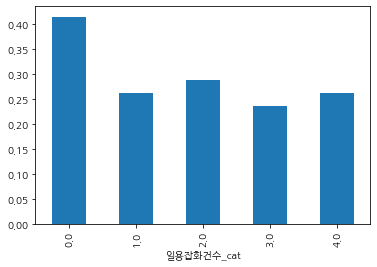

In [58]:
X_train.groupby('일용잡화건수_cat')['gender'].mean().plot(kind='bar')

2-6 육류건수 범주형변수로 변환

In [59]:
X_train['육류건수2'] = pd.qcut(X_train.육류건수,15,duplicates='drop')
X_train.groupby('육류건수2')['gender'].mean().reset_index()

,육류건수2,gender
0,"(-0.001, 1.0]",0.406421
1,"(1.0, 2.0]",0.317949
2,"(2.0, 3.0]",0.235294
3,"(3.0, 7.0]",0.259091
4,"(7.0, 108.0]",0.244444


In [60]:
# train 변수 변환

X_train['육류건수_cat']=pd.Series()

X_train.loc[ (X_train.육류건수 <= 1) , '육류건수_cat'] = 0
X_train.loc[(X_train.육류건수 > 1) & (X_train.육류건수 <= 2) , '육류건수_cat'] = 1
X_train.loc[(X_train.육류건수 > 2) & (X_train.육류건수 <= 3) , '육류건수_cat'] = 2
X_train.loc[(X_train.육류건수 > 3) & (X_train.육류건수 <= 7) , '육류건수_cat'] = 3
X_train.loc[(X_train.육류건수 > 7),'육류건수_cat'] = 4

# test 변수 변환

X_test['육류건수_cat']=pd.Series()

X_test.loc[(X_test.육류건수 <= 1) , '육류건수_cat'] = 0
X_test.loc[(X_test.육류건수 > 1) & (X_test.육류건수 <= 2) , '육류건수_cat'] = 1
X_test.loc[(X_test.육류건수 > 2) & (X_test.육류건수 <= 3) , '육류건수_cat'] = 2
X_test.loc[(X_test.육류건수 > 3) & (X_test.육류건수 <= 7) , '육류건수_cat'] = 3
X_test.loc[(X_test.육류건수 > 7),'육류건수_cat'] = 4

In [61]:
X_train.groupby('육류건수_cat')['gender'].mean().reset_index()

# 육류건수 그룹이 0,1일 때 여성일 확률이 높음

,육류건수_cat,gender
0,0.0,0.406421
1,1.0,0.317949
2,2.0,0.235294
3,3.0,0.259091
4,4.0,0.244444


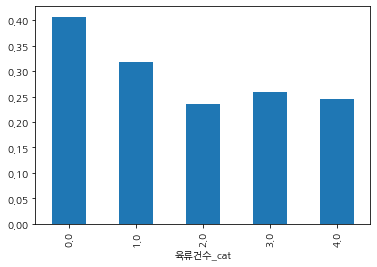

In [62]:
X_train.groupby('육류건수_cat')['gender'].mean().plot(kind='bar')

2-7 차/커피구매건수 범주형변수로 변환

In [63]:
X_train['차/커피건수2'] = pd.qcut(X_train['차/커피건수'],10,duplicates='drop')
X_train.groupby('차/커피건수2')['gender'].mean().reset_index()

,차/커피건수2,gender
0,"(-0.001, 1.0]",0.397488
1,"(1.0, 2.0]",0.320833
2,"(2.0, 4.1]",0.354680
3,"(4.1, 314.0]",0.260000


In [64]:
# train 변수 변환

X_train['차/커피건수_cat']=pd.Series()

X_train.loc[(X_train['차/커피건수'] <= 1) , '차/커피건수_cat'] = 0
X_train.loc[(X_train['차/커피건수'] > 1) & (X_train['차/커피건수'] <= 2) , '차/커피건수_cat'] = 1
X_train.loc[(X_train['차/커피건수'] > 2) & (X_train['차/커피건수'] <= 4) , '차/커피건수_cat'] = 2
X_train.loc[(X_train['차/커피건수'] > 4),'차/커피건수_cat'] = 3

# test 변수 변환

X_test['차/커피건수_cat']=pd.Series()

X_test.loc[(X_test['차/커피건수'] <= 1) , '차/커피건수_cat'] = 0
X_test.loc[(X_test['차/커피건수'] > 1) & (X_test['차/커피건수'] <= 2) , '차/커피건수_cat'] = 1
X_test.loc[(X_test['차/커피건수'] > 2) & (X_test['차/커피건수'] <= 4) , '차/커피건수_cat'] = 2
X_test.loc[(X_test['차/커피건수'] > 4),'차/커피건수_cat'] = 3

In [65]:
X_train.groupby('차/커피건수_cat')['gender'].mean().reset_index()

# 다른 품목들과 다르게 그룹이 2일 때 남성일 확률이 가장 높음

,차/커피건수_cat,gender
0,0.0,0.397488
1,1.0,0.320833
2,2.0,0.354680
3,3.0,0.260000


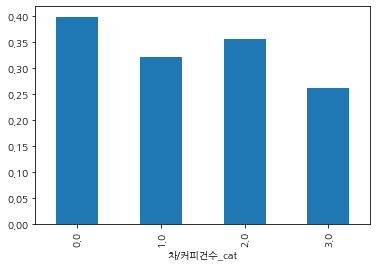

In [66]:
X_train.groupby('차/커피건수_cat')['gender'].mean().plot(kind='bar')

numeric 변수일 때는 성별에 따른 차이가 거의 없었지만, 그룹화하여 범주형 변수인 파생변수를 만들었을 때는 각 그룹별로 성별의 비율에 차이가 난다고 할 수 있다.

3 변수간 상호작용을 나타내는 피쳐

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


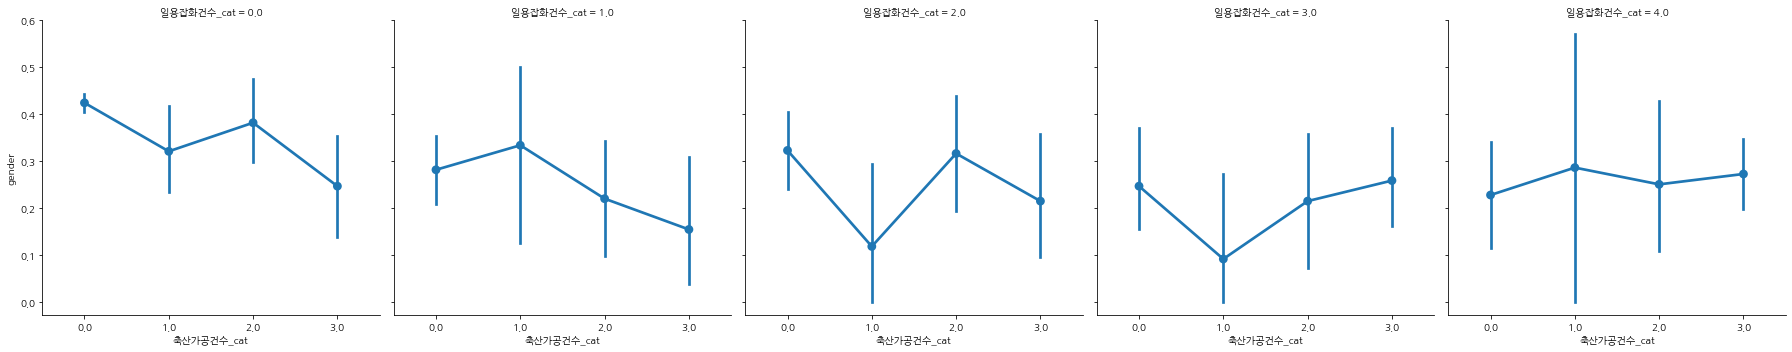

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


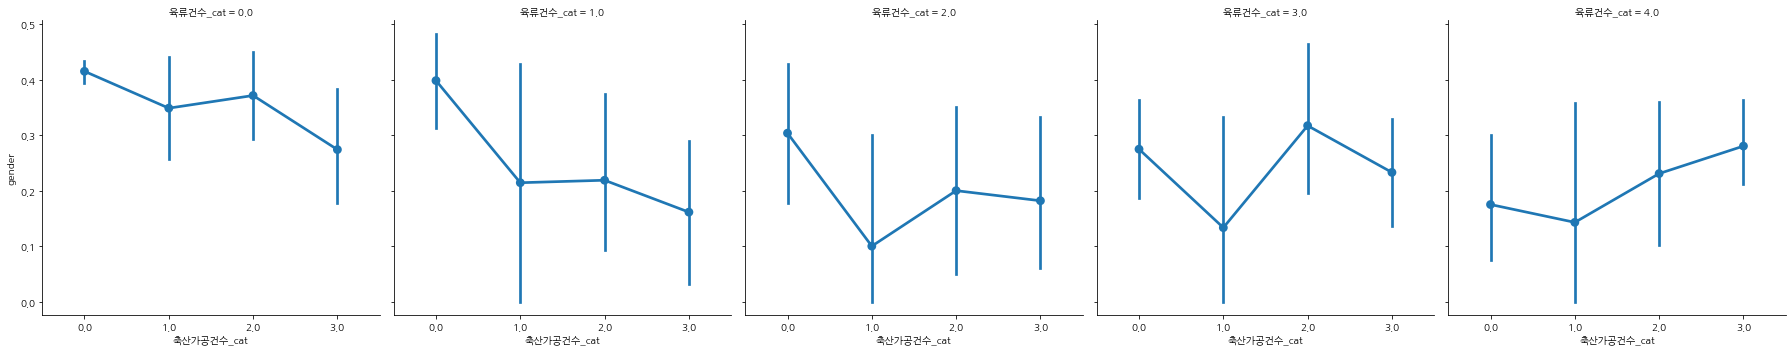

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


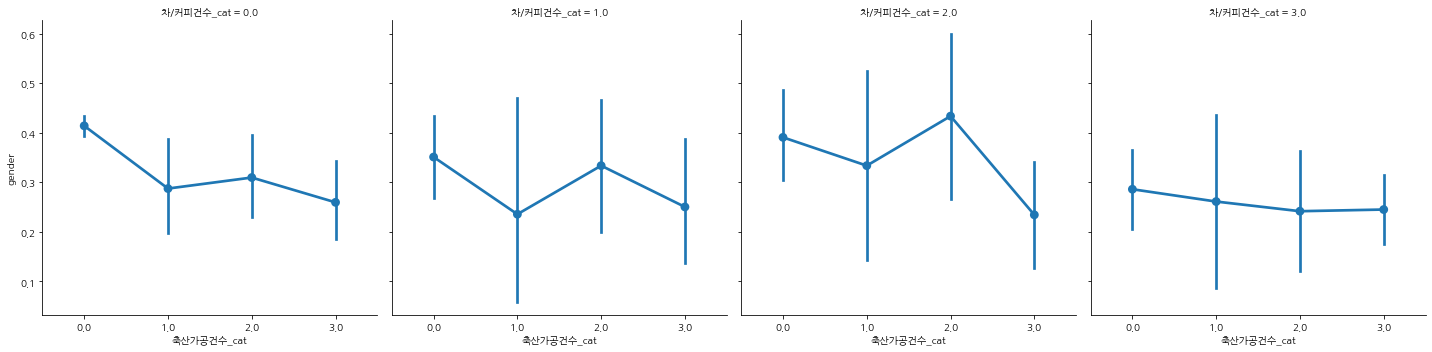

In [67]:
sns.factorplot('축산가공건수_cat','gender',data=X_train,col='일용잡화건수_cat')
plt.show()
sns.factorplot('축산가공건수_cat','gender',data=X_train,col='육류건수_cat')
plt.show()
sns.factorplot('축산가공건수_cat','gender',data=X_train,col='차/커피건수_cat')
plt.show()

In [68]:
def interaction(data,col1,val1,col2,val2) :
    inter = []
    for x in range(len(data)):
        if (data.loc[x,col1] == float(val1)) & (data.loc[x,col2] == float(val2)) :
            inter.append(1)
        else:
            inter.append(0)
    return inter

3-1. 축산가공건수cat이 3이면서 일용잡화건수cat이 3이면 남성

In [69]:
X_train['int_축산_일용'] = interaction(X_train,'축산가공건수_cat',3,'일용잡화건수_cat',3)
X_test['int_축산_일용'] = interaction(X_test,'축산가공건수_cat',3,'일용잡화건수_cat',3)

3-2. 축산가공건수cat이 2이면서 차/커피건수cat이 2이면 남성일 확률이 높음

In [70]:
X_train['int_축산_차/커피'] = interaction(X_train,'축산가공건수_cat',2,'차/커피건수_cat',2)
X_test['int_축산_차/커피'] = interaction(X_test,'축산가공건수_cat',2,'차/커피건수_cat',2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


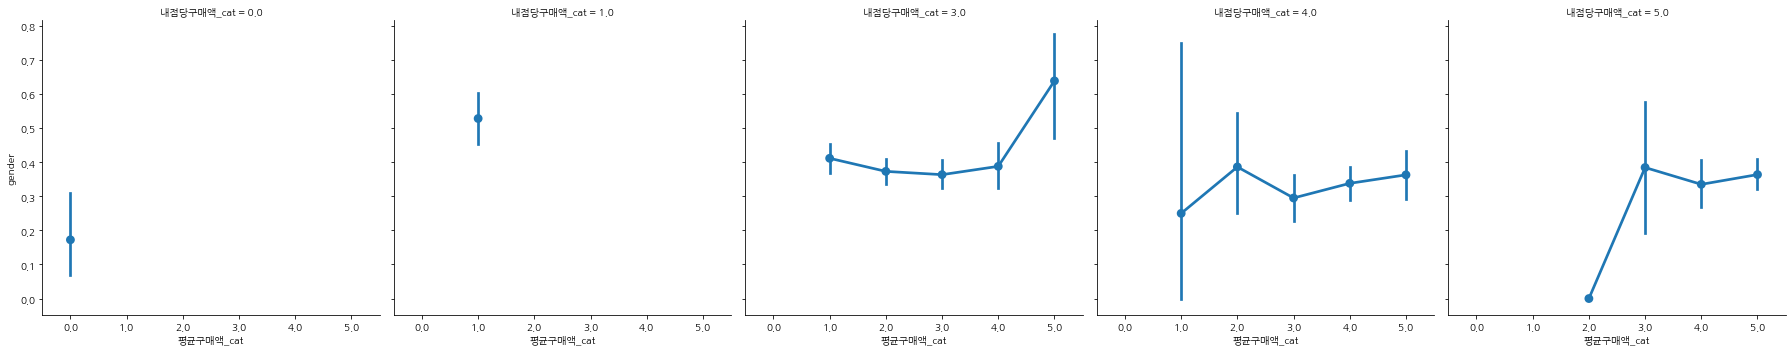

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


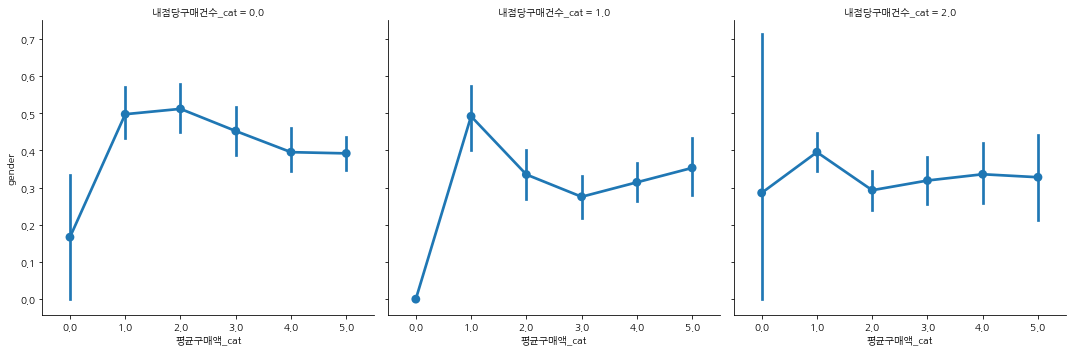

In [71]:
sns.factorplot('평균구매액_cat','gender',data=X_train,col='내점당구매액_cat')
plt.show()
sns.factorplot('평균구매액_cat','gender',data=X_train,col='내점당구매건수_cat')
plt.show()

3-3. 평균구매액 cat이 5이면서 내점당구매액cat이 3이면 남성

In [556]:
X_train['int_평균_내점당'] = interaction(X_train,'평균구매액_cat',5,'내점당구매액_cat',3)
X_test['int_평균_내점당'] = interaction(X_test,'평균구매액_cat',5,'내점당구매액_cat',3)

3-4. 평균구매액 cat이 2이면서 내점당구매건수cat이 0이면 남성

In [72]:
X_train['int_평균_내점당건수'] = interaction(X_train,'평균구매액_cat',2,'내점당구매건수_cat',0)
X_test['int_평균_내점당건수'] = interaction(X_test,'평균구매액_cat',2,'내점당구매건수_cat',0)

필요 없는 변수 제거

In [73]:
X_train = X_train.drop(['평균구매액2','내점당구매건수2','내점당구매액2','축산가공건수2','일용잡화건수2','육류건수2',
              '축산가공건수2','일용잡화건수2','육류건수2','차/커피건수2'],axis='columns')

csv 파일로 내보내기

In [74]:
X_train.to_csv('X_Featrues_train.csv',index=False)
X_test.to_csv('X_Features_test.csv',index=False)

### 범주형변수 원-핫 인코딩 변환

    train데이터와 test데이터의 범주형 변수의 범주가 다르기 때문에 더미 변수의 개수가 달라진다.

    따라서 train과 test의 더미변수 개수를 맞추기 위해 한꺼번에 더미변수로 변환 후 split한다.

train데이터와 test데이터의 범주형 변수

In [243]:
categoric = X_train.columns[59:62]
categoric = categoric.append(X_train.columns[69:71])
categoric = categoric.append(X_train.columns[91:])

In [244]:
categoric2 = X_test.columns[59:62]
categoric2 = categoric2.append(X_test.columns[69:71])
categoric2 = categoric2.append(X_test.columns[90:])

In [245]:
X_categoric = pd.concat([X_train[categoric],X_test[categoric2]])
X_categoric = X_categoric.astype('category')
X_categoric.head()

,주구매상품_x,주구매지점,상품구매순서,주구매상품_y,선호계절,평균구매액_cat,내점당구매액_cat,내점당구매건수_cat,축산가공건수_cat,일용잡화건수_cat,육류건수_cat,차/커피건수_cat,int_축산_일용,int_축산_차/커피,int_평균_내점당건수
0,기타,강남점,건강식품,상품군미지정,여름,3.0,3.0,2.0,1.0,0.0,4.0,0.0,0,0,0
1,스포츠,잠실점,스포츠,아웃도아,가을,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,남성 캐주얼,관악점,남성 캐주얼,시티캐주얼,겨울,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,기타,광주점,수산품,상품군미지정,봄,2.0,3.0,1.0,0.0,1.0,1.0,1.0,0,0,0
4,화장품,본 점,화장품,보석,가을,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [246]:
data_dummies = pd.get_dummies(X_categoric)
data_dummies.head()

,주구매상품_x_가공식품,주구매상품_x_가구,주구매상품_x_건강식품,주구매상품_x_골프,주구매상품_x_구두,주구매상품_x_기타,주구매상품_x_남성 캐주얼,주구매상품_x_남성 트랜디,주구매상품_x_남성정장,주구매상품_x_농산물,...,차/커피건수_cat_0.0,차/커피건수_cat_1.0,차/커피건수_cat_2.0,차/커피건수_cat_3.0,int_축산_일용_0,int_축산_일용_1,int_축산_차/커피_0,int_축산_차/커피_1,int_평균_내점당건수_0,int_평균_내점당건수_1
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [247]:
data_dummies_train = data_dummies[:len(X_train)]
data_dummies_test = data_dummies[len(X_train):]

### PCA

원 핫 인코딩 후 데이터가 sparse 해졌기 때문에 데이터를 dense하게 만들기 위해 PCA를 수행하여 차원을 축소시킨다.

In [248]:
from sklearn.decomposition import PCA
import numpy as np

In [249]:
from sklearn.decomposition import PCA

def get_optimal_pca(X_train, columns) :
# 입력 : X_train(학습할 데이터 프레임), columns : 범주형인 칼럼들 리스트

    # 원핫 인코딩한 상태로 변환
    dummy = pd.get_dummies(X_train[columns]) 
    
    # 차원축소
    pca = PCA()
    pca.fit_transform(dummy)
    
    # 분산의 설명량 누적합 계산
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # 분산의 설명량이 99% 이상되는 차원의 수 (num_d)를 추출
    num_d = np.argmax(cumsum >= 0.99) + 1 
    
    # 객체로 할당
    pca = PCA(n_components=num_d)  
    
    #반환
    return pca

def transform_pca(pca, X, dummy_columns,i='train'):
#  pca : 객체, X : 데이터프레임, dummy_columns : 범주형인 칼럼들 리스트,
#     i : train이면 학습 + 변환, test면 변환만
    
    if i == 'train':
        dummy = pca.fit_transform(pd.get_dummies(X[dummy_columns]))
    
    elif i == 'test':
        dummy = pca.transform(pd.get_dummies(X[dummy_columns]))
        
    # 결과값을 dummy_0, dummy_1 ... 이런식으로 이름 붙여줌
    dummy = pd.DataFrame(dummy,columns = ['dummies' + '_' + str(column) for column in range(dummy.shape[1])])
    
    # 원본에서 범주형 칼럼 떨구고 변환
    df = pd.concat([X.drop(dummy_columns,axis=1),dummy],axis=1)
    
    return df

In [250]:
pca = PCA()
pca.fit_transform(data_dummies_train)
    
# 분산의 설명량 누적합 계산
cumsum = np.cumsum(pca.explained_variance_ratio_)
    
# 분산의 설명량이 99% 이상되는 차원의 수 (num_d)를 추출
num_d = np.argmax(cumsum >= 0.99) + 1 

# 객체로 할당
pca = PCA(n_components=num_d)  

train데이터와 test데이터의 더미변수들에 PCA적용 후 numeric 변수들과 합침

In [251]:
dummy = pca.fit_transform(data_dummies_train)
dummy = pd.DataFrame(dummy,columns = ['dummies' + '_' + str(column) for column in range(dummy.shape[1])])
    
X_onehot_train = pd.concat([X_train.drop(categoric,axis=1),dummy],axis=1)

In [252]:
dummy = pca.transform(data_dummies_test)
dummy = pd.DataFrame(dummy,columns = ['dummies' + '_' + str(column) for column in range(dummy.shape[1])])
    
X_onehot_test = pd.concat([X_test.drop(categoric2,axis=1),dummy],axis=1)

In [253]:
X_onehot_train.head()
# gender 포함 276개의 column
# 차후 feature selection 전에 gender는 제거

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,...,dummies_180,dummies_181,dummies_182,dummies_183,dummies_184,dummies_185,dummies_186,dummies_187,dummies_188,dummies_189
0,0,68282840.0,74.0,922741.0,11264000.0,35,28,17,19,17,...,0.014801,0.027519,-0.007046,-0.017521,0.028929,0.017471,0.012544,-0.013946,0.001542,-0.013080
1,1,2136000.0,3.0,712000.0,2136000.0,2,2,2,2,1,...,0.003681,-0.006990,0.004477,0.009272,0.004854,-0.005374,0.003229,-0.004333,-0.006520,-0.006057
2,2,3197000.0,4.0,799250.0,1639000.0,1,2,2,2,1,...,-0.006888,-0.010176,0.010829,0.007321,-0.011409,0.002837,0.001483,0.004913,0.004107,-0.004139
3,3,16077620.0,44.0,365400.0,4935000.0,24,20,13,18,16,...,0.004288,0.004221,0.011569,0.003282,-0.000368,0.006728,0.007541,-0.002811,0.006783,-0.004696
4,4,18100000.0,3.0,6033333.0,13050000.0,2,3,3,2,85,...,0.021936,0.023068,-0.002967,0.022321,0.002292,0.026109,0.020385,-0.036640,0.024821,-0.028314


In [254]:
X_onehot_test.head()

,cust_id,총구매액,구매건수,평균구매액,최대구매액,구매상품종류1,구매상품종류2,구매상품종류3,내점일수,구매주기,...,dummies_180,dummies_181,dummies_182,dummies_183,dummies_184,dummies_185,dummies_186,dummies_187,dummies_188,dummies_189
0,3500,55200400.0,19.0,2905284.0,13050000.0,15,13,10,13,26,...,-0.018520,0.017538,-0.013024,-0.002947,-0.078512,0.076604,-0.021800,0.074163,-0.014813,-0.033884
1,3501,260637600.0,219.0,1190126.0,13050000.0,37,28,13,90,3,...,-0.281875,-0.045617,-0.102075,-0.066132,-0.033063,0.007751,0.071171,0.051861,-0.027062,0.098472
2,3502,303489140.0,1477.0,205477.0,13050000.0,144,74,24,101,3,...,0.001372,0.007226,-0.016886,-0.006499,0.003781,-0.010673,-0.004191,-0.001025,0.004166,-0.001687
3,3503,7594080.0,10.0,759408.0,5225000.0,7,8,7,5,47,...,0.111550,-0.024658,-0.033620,-0.005497,-0.065933,-0.009144,-0.005374,-0.013825,-0.077681,-0.217392
4,3504,1795790.0,8.0,224474.0,1411200.0,6,7,6,3,8,...,-0.013591,-0.015149,-0.006272,-0.002631,-0.001804,0.007887,0.004418,-0.004858,0.002136,0.003714


결과 csv 파일로 내보내기

In [93]:
X_onehot_train.to_csv('onehot_train.csv',index = False)
X_onehot_test.to_csv('onehot_test.csv',index = False)

### Feature Selection

필요 없는 변수 제거

In [255]:
X_onehot_train = X_onehot_train.drop(['cust_id','gender'],axis='columns')
X_onehot_test = X_onehot_test.drop(['cust_id'],axis='columns')

1. 단일 변수 성능 기준으로 변수 선택

SelectKBest 사용
(음수 값이 있는 변수도 있으므로 카이제곱은 사용 X)

In [256]:
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [257]:
%%time

selector1 = SelectKBest(k=100)
X_train1 = selector1.fit_transform(X_onehot_train, y_train['gender'])
X_test1 = selector1.transform(X_onehot_test)

Wall time: 44.8 ms


단일 변수 성능 기준으로 변수 선택시 성능

In [260]:
model = BernoulliNB()
model.fit(X_train1, y_train['gender'])
print("train accuracy:{:5.3f}".format(accuracy_score(y_train['gender'], model.predict(X_train1))))
#print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test1))))

train accuracy:0.629


2. 랜덤포레스트를 이용하여 특성 중요도 계산

In [261]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [262]:
y_train=y_train['gender']

In [263]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_onehot_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
 

In [264]:
selected_feat= X_onehot_train.columns[(sel.get_support())]
selected_feat
#len(selected_feat) : 144개 피쳐 선택

Index(['총구매액', '평균구매액', '최대구매액', '주말방문비율', '내점당구매액', '최근6개월_구매금액',
       '최근12개월_구매금액', '화장품금액', '디자이너금액', '시티웨어금액',
       ...
       'dummies_173', 'dummies_175', 'dummies_176', 'dummies_177',
       'dummies_178', 'dummies_179', 'dummies_180', 'dummies_183',
       'dummies_187', 'dummies_189'],
      dtype='object', length=142)

In [108]:
model = BernoulliNB()
model.fit(X_onehot_train[selected_feat], y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_onehot_train[selected_feat]))))
#print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test_sel))))

train accuracy:0.669


SelectBestK train accuracy : 0.630

RandomForest train accuracy : 0.669
    
랜덤포레스트 모형을 이용하는 방식으로 선택된 피쳐를 최종 모델에 사용하도록 한다.

In [109]:
X_select_train = X_onehot_train[selected_feat]
X_select_test = X_onehot_test[selected_feat]

결과 csv 파일로 내보내기

In [110]:
#X_select_train.to_csv('X_select_train.csv',index=False)
#X_select_test.to_csv('X_select_testc.csv',index=False)

### 정규화

    모든 변수의 값이 0에서 1사이가 되도록 Min-Max scale 사용한다.

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()
X_scale_train = X_select_train.copy()
X_scale_test = X_select_test.copy()
X_scale_train[:] = scaler.fit_transform(X_select_train[:])
X_scale_test[:] = scaler.transform(X_select_test[:])

In [115]:
X_scale_train.head()

# 모든 변수의 값이 0에서 1 사이

,총구매액,평균구매액,최대구매액,주말방문비율,내점당구매액,최근6개월_구매금액,최근12개월_구매금액,화장품금액,디자이너금액,시티웨어금액,...,dummies_170,dummies_172,dummies_173,dummies_175,dummies_176,dummies_177,dummies_178,dummies_186,dummies_188,dummies_189
0,0.275735,0.736352,0.888667,0.527027,0.580497,0.373148,0.275735,0.045643,0.436033,0.094192,...,0.401477,0.453245,0.165891,0.389407,0.329583,0.345907,0.354441,0.495176,0.440856,0.496698
1,0.240082,0.731771,0.319661,0.000000,0.540372,0.334529,0.240082,0.014221,0.425809,0.080073,...,0.342092,0.340684,0.180285,0.390631,0.356286,0.434681,0.359385,0.418816,0.463427,0.476769
2,0.240654,0.733668,0.288680,0.000000,0.548800,0.332491,0.240654,0.014221,0.425809,0.080073,...,0.322340,0.342260,0.180349,0.405867,0.362433,0.442384,0.363353,0.401431,0.439592,0.487978
3,0.247596,0.724236,0.494140,0.318182,0.537595,0.333716,0.247596,0.014221,0.425809,0.080073,...,0.354353,0.330850,0.185792,0.397080,0.356668,0.414393,0.369994,0.431651,0.449689,0.495018
4,0.248686,0.847457,1.000000,0.000000,0.667173,0.347808,0.248686,0.017090,0.425809,0.080073,...,0.352882,0.285736,0.144866,0.377586,0.395215,0.397418,0.329888,0.492960,0.444950,0.518679


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


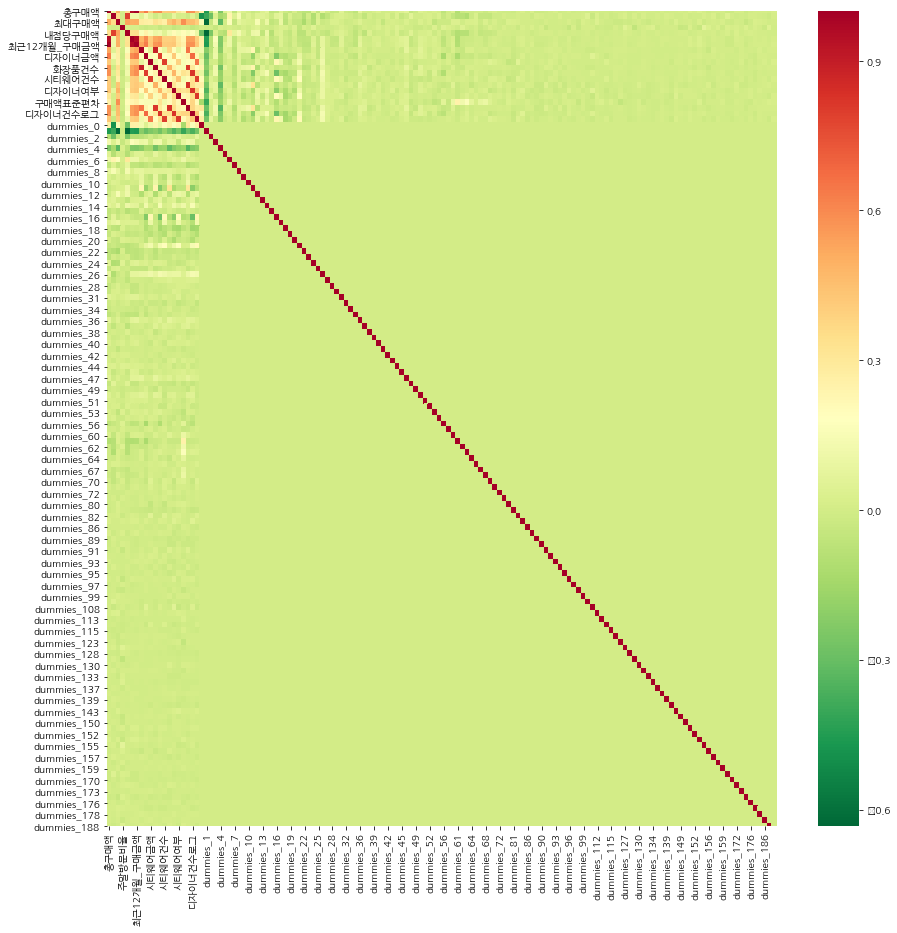

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(data=X_scale_train.corr(),cmap='RdYlGn_r')
plt.show()

결과 csv 파일로 내보내기

In [119]:
#X_scale_train.to_csv('X_scale_train.csv',index=False)
#X_scale_test.to_csv('X_scale_test.csv',index=False)

## Part 3. Modeling

In [3]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

학습 데이터와 검증 데이터 분할

In [5]:
X_train_fin, X_valid, y_train_fin, y_valid = train_test_split(
    X_scale_train, y_train, random_state=2)

### 단일 모델 성능 확인

In [6]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [79]:
# Modeling step Test differents algorithms 

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_fin, y = y_train_fin,
                                      scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest",
                                    "ExtraTrees","GradientBoosting","MultipleLayerPerceptron",
                                    "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

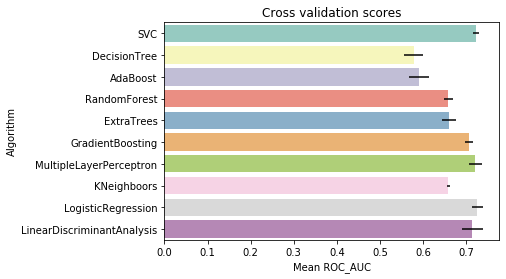

In [82]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean ROC_AUC")
g = g.set_title("Cross validation scores")

In [83]:
cv_res.sort_values(by='CrossValMeans',ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
8,0.726404,0.013684,LogisticRegression
0,0.722381,0.006674,SVC
6,0.721403,0.015282,MultipleLayerPerceptron
9,0.714759,0.024530,LinearDiscriminantAnalysis
5,0.707368,0.009840,GradientBoosting
4,0.661153,0.016601,ExtraTrees
3,0.658601,0.010436,RandomForest
7,0.658538,0.003802,KNeighboors
2,0.591014,0.022921,AdaBoost
1,0.578414,0.022397,DecisionTree


In [84]:
cv_res.sort_values(by='CrossValerrors')

,CrossValMeans,CrossValerrors,Algorithm
7,0.658538,0.003802,KNeighboors
0,0.722381,0.006674,SVC
5,0.707368,0.009840,GradientBoosting
3,0.658601,0.010436,RandomForest
8,0.726404,0.013684,LogisticRegression
6,0.721403,0.015282,MultipleLayerPerceptron
4,0.661153,0.016601,ExtraTrees
1,0.578414,0.022397,DecisionTree
2,0.591014,0.022921,AdaBoost
9,0.714759,0.024530,LinearDiscriminantAnalysis


단일 모델 CV 정확도 평균은 LogisticRegression이 제일 높으며 DecisionTree가 제일 낮다.

CV error는 KNN이 가장 낮으며 LDA가 가장 높다.

따라서 알고리즘은 Logistic, SVC, MLP, GDB, RF, KNN 6개만 고려한다.

AdaBoost와 DT는 성능이 낮기 때문에 제외한다.

ExtraTree와 GDB는 정확도 평균은 높지만, 에러가 크기 때문에 제외한다.

### 하이퍼 파라미터 튜닝

In [87]:
clfs = [
    (
        LogisticRegression(random_state=2),
        {'penalty' : ['l1','l2'],
         'C':[0.01,0.1,10]}
    ),
    (
        SVC(random_state=random_state,probability=True),  # predict_proba가 되려면 probablility = True
        {'kernel':['linear', 'rbf'],
         'C':[1, 10]}
    ),
    (
        MLPClassifier(random_state=random_state),
        {'batch_size': [64, 128, 256],
         'hidden_layer_sizes': [(50,50,50), (100,50,50), (100,)],
         'learning_rate' : ['constant', 'adaptive'],
         'alpha': [0.001, 0.01, 0.1],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam']}
    ),
    (
        GradientBoostingClassifier(random_state = random_state),
        {'n_estimators':[100,200,300],
        'learning_rate':[1,0.1,0.01]}
    ),
    (
        RandomForestClassifier(random_state=random_state),
        {'n_estimators': range(100,1000,100)}
    ),
   (
        KNeighborsClassifier(),              
        {'n_neighbors': range(2,10),
         'weights': ['uniform','distance']}
    ),
]

random search로 진행

In [89]:
clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in clfs:
    rand_search = RandomizedSearchCV(clf, param_grid, scoring='roc_auc', 
                                     cv=4, n_jobs=-1)
    rand_search.fit(X_train_fin, y_train_fin)
    clf_name = type(clf).__name__
    print(rand_search.best_score_)
    print(rand_search.best_params_)
    clfs_tuned.append((clf_name, rand_search))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.7295614585423713
{'penalty': 'l2', 'C': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7230380542980271
{'kernel': 'rbf', 'C': 10}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.7249594398494268
{'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}
0.71662707228705
{'n_estimators': 300, 'learning_rate': 0.01}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.7071368899686982
{'n_estimators': 700}
0.673728605106884
{'weights': 'distance', 'n_neighbors': 8}


각 개별 모델별 하이퍼파라미터 튜닝 후 성능을 확인하면,

LogisticRegression 0.7295614585423713

SVC 0.7230380542980271

MLPClassifier 0.7249594398494268

GradientBoostingClassifier 0.71662707228705

RandomForestClassifier 0.7071368899686982

KNeighborsClassifier 0.673728605106884


튜닝 후 각 모델별 roc-auc는 Logistic,MLP,SVC,GBC 순으로 높다.

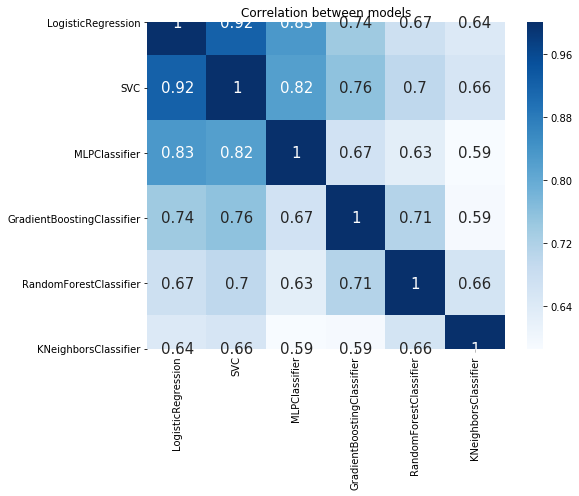

In [212]:
ensemble_results = pd.concat(pred_results, axis=1)
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues',annot_kws={"size": 15})
g.set_title("Correlation between models")
plt.show()

LogisticRegression과 SVC가 다른 모델들과 상관관계가 높다

### soft voting

1. 모든 모델 사용 / soft voting

In [107]:
voting = VotingClassifier(
    estimators = [(name,clf) for name,clf in clfs_tuned], voting='soft')
voting.fit(X_train_fin, y_train_fin)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to

0.7005714285714286

In [172]:
roc_auc_score(y_valid,voting.predict_proba(X_valid)[:,1])

0.7336335835418405

2. top3 모델 선택 후 soft voting

개별 모델의 성능이 높은 순대로 Logistic,MLP,SVC 세 개를 선택하여 앙상블

In [109]:
selected = [
    'LogisticRegression', 
    'MLPClassifier',
    'SVC'
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [149]:
estimators = []
for name, clf in clfs_tuned:
    if name in selected:
        estimators.append((name,clf))

In [150]:
estimators

[('LogisticRegression',
  RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                     estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn', n_jobs=None,
                                                  penalty='l2', random_state=2,
                                                  solver='warn', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     iid='warn', n_iter=10, n_jobs=-1,
                     param_distributions={'C': [0.01, 0.1, 10],
                                          'penalty': ['l1', 'l2']},
                     pre_dispatch='2*n_jobs', random_state=None, refit=True,
                     ret

In [165]:
top3_voting = VotingClassifier(estimators=estimators, voting='soft')
top3_voting.fit(X_train_fin, y_train_fin)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to

VotingClassifier(estimators=[('LogisticRegression',
                              RandomizedSearchCV(cv=4,
                                                 error_score='raise-deprecating',
                                                 estimator=LogisticRegression(C=1.0,
                                                                              class_weight=None,
                                                                              dual=False,
                                                                              fit_intercept=True,
                                                                              intercept_scaling=1,
                                                                              l1_ratio=None,
                                                                              max_iter=100,
                                                                              multi_class='warn',
                                                           

In [170]:
roc_auc_score(y_valid,top3_voting.predict_proba(X_valid)[:,1])

0.733094245204337

soft voting의 경우 top3 모델만 사용했을 때 모든 모델을 사용한 경우보다 roc-auc가 약간 더 낮다.

3. 모든 모델 사용 / stacking

In [173]:
from vecstack import StackingTransformer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [191]:
stack = StackingTransformer(estimators=estimators, regression=True, verbose = 2)
stack.fit(X_train_fin,y_train_fin)

task:         [regression]
metric:       [mean_absolute_error]
variant:      [A]
n_estimators: [3]

estimator  0: [LogisticRegression: RandomizedSearchCV]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  0:  [0.28614916]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  1:  [0.31554878]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  2:  [0.31707317]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  3:  [0.30335366]
    ----
    MEAN:     [0.30553119] + [0.01238925]

estimator  1: [SVC: RandomizedSearchCV]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    fold  0:  [0.37747336]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    fold  1:  [0.33079268]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    fold  2:  [0.32621951]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


    fold  3:  [0.31097561]
    ----
    MEAN:     [0.33636529] + [0.02484200]

estimator  2: [MLPClassifier: RandomizedSearchCV]
    fold  0:  [0.32115677]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  1:  [0.32164634]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  2:  [0.31402439]
    fold  3:  [0.30030488]
    ----
    MEAN:     [0.31428310] + [0.00861572]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


StackingTransformer(estimators=[('LogisticRegression',
                                 RandomizedSearchCV(cv=4,
                                                    error_score='raise-deprecating',
                                                    estimator=LogisticRegression(C=1.0,
                                                                                 class_weight=None,
                                                                                 dual=False,
                                                                                 fit_intercept=True,
                                                                                 intercept_scaling=1,
                                                                                 l1_ratio=None,
                                                                                 max_iter=100,
                                                                                 multi_class='warn',
                          

In [190]:
S_train = stack.transform(X_train_fin)
S_valid = stack.transform(X_valid)

In [189]:
stacking_model = LogisticRegression().fit(S_train, y_train_fin)
print(roc_auc_score(y_valid, stacking_model.predict_proba(S_valid)[:,1]))

0.691715318320823


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4. 상관계수가 낮은 모델 stacking

In [266]:
selected = [
    'MLPClassifier', 
    'KNeighborsClassifier',
    'RandomForestClassifier',
    'GradientBoostingClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [267]:
estimators = []
for name, clf in clfs_tuned:
    if name in selected:
        estimators.append((name,clf))

In [268]:
stack = StackingTransformer(estimators=estimators, regression=True, verbose = 2)
stack.fit(X_train_fin,y_train_fin)

S_train2 = stack.transform(X_train_fin)
S_valid2 = stack.transform(X_valid)

stacking_model = LogisticRegression().fit(S_train2, y_train_fin)
print(roc_auc_score(y_valid, stacking_model.predict_proba(S_valid2)[:,1]))

task:         [regression]
metric:       [mean_absolute_error]
variant:      [A]
n_estimators: [4]

estimator  0: [MLPClassifier: RandomizedSearchCV]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  0:  [0.28919330]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  1:  [0.33993902]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  2:  [0.30487805]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  3:  [0.30182927]
    ----
    MEAN:     [0.30895991] + [0.01882772]

estimator  1: [GradientBoostingClassifier: RandomizedSearchCV]
    fold  0:  [0.30289193]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  1:  [0.35670732]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  2:  [0.33536585]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  3:  [0.32774390]
    ----
    MEAN:     [0.33067725] + [0.01923653]

estimator  2: [RandomForestClassifier: RandomizedSearchCV]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  0:  [0.30136986]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  1:  [0.34298780]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  2:  [0.33384146]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


    fold  3:  [0.32164634]
    ----
    MEAN:     [0.32496137] + [0.01558330]

estimator  3: [KNeighborsClassifier: RandomizedSearchCV]
    fold  0:  [0.32267884]
    fold  1:  [0.34451220]
    fold  2:  [0.33231707]
    fold  3:  [0.32926829]
    ----
    MEAN:     [0.33219410] + [0.00791914]

Train set was detected.
Transforming...

estimator  0: [MLPClassifier: RandomizedSearchCV]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [GradientBoostingClassifier: RandomizedSearchCV]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [RandomForestClassifier: RandomizedSearchCV]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  3: [KNeighborsClassifier: RandomizedSearchCV]
    model from fold  0: done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [269]:
print(roc_auc_score(y_valid, stacking_model.predict_proba(S_valid2)[:,1]))

0.7125688073394496


## Part 4. Prediction

soft voting의 경우, roc-auc가 모든 모델을 앙상블 했을 때는 약 0.734이며 성능이 가장 좋은 top3 모델을 앙상블 했을 때는 약 0.733였다.

모든 모델을 사용한 경우가 roc-auc는 조금 더 높지만 너무 많은 모델을 사용하였기 때문에 과적합의 우려가 있다.

따라서 성능이 높은 top3모델을 이용해 soft voting 앙상블 모델을 사용하는 것을 최종적으로 결정한다.

(해당 모형은 LogistRegression, MLP, SVC를 포함한다)

In [270]:
selected = [
    'MLPClassifier',
    'LogisticRegression', 
    'SVC'
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [271]:
estimators = []
for name, clf in clfs_tuned:
    if name in selected:
        estimators.append((name,clf))

In [ ]:
top3_voting2 = VotingClassifier(estimators=estimators, voting='soft')
top3_voting2.fit(X_train_fin, y_train_fin)

In [276]:
test_gender = pd.Series(top3_voting2.predict_proba(X_scale_test)[:,1],name='gender')

In [283]:
submission = pd.DataFrame({'cust_id' : X_test['cust_id'],'gender':test_gender})
submission.to_csv('submission.csv',index=False)